<center><h2><span style="font-weight:bolder; color:teal; font-size:120%">Linear Regression Project: Car Price Prediction</span></h2></center>

<center><h2><span style="font-weight:bolder; color:black; font-size:90%">Melissa Jalali Monfared</span></h2></center>

<a id="content"></a>    
<div style="border-radius:20px; padding: 15px; font-size:110%; text-align:left">

<center><h2><span style="font-weight:bolder; color:black; font-size:70%">       Table of Contents:</span></h2></center>

 *  **[- | About Dataset](#about)**
 *  **[- | PreProcessing](#pre)**
 *  **[- | EDA & Visualization](#v)**
 *  **[- | ML: Linear Regression](#ml)**

<a id="about"></a>
# <p style="background-color:lightsteelblue;font-family:newtimeroman;font-size:100%;color:blackData Description ;text-align:center;border-squar:15px 50px; padding:7px">About Dataset</p>

<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:20px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:20px">Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>Car_Name </b></td>
<td>Car's Name</td>
</tr>
<tr>
<td><b>Year </b></td>
<td>The year the car was purchased</td>
</tr>
<tr>
<td><b>Selling_Price </b></td>
<td><br>The price we are going to sell the car at</td>
</tr>
<tr>
<td><b>Present_Price </b></td>
<td>The price at which the car was sold</td>
</tr>
<tr>
<td><b>Kms_Driven</b></td>
<td>The number of kilometers driven by the car</td>
</tr>
<tr>
<td><b>Fuel_Type </b></td>
<td>Car's fuel type</td>
</tr>
<tr>
<td><b>Seller_Type </b></td>
<td>Seller's type (individual or dealer)</td>
</tr>
<tr>
<td><b>Transmission </b></td>
<td>The type of car gear, which is manual or automatic</td>
</tr>
<tr>
<td><b>Owner </b></td>
<td>The number of previous owners of the car</td>
</tr>
</tbody>
</table>

<a id="pre"></a>
# <p style="background-color:lightsteelblue;font-family:newtimeroman;font-size:100%;color:blackData Description ;text-align:center;border-squar:15px 50px; padding:7px">PreProcessing</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from warnings import filterwarnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold , cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.preprocessing import MinMaxScaler
filterwarnings("ignore")

In [2]:
data = pd.read_csv('/kaggle/input/cardata/cardata.csv')
df = pd.DataFrame(data)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

### there is 8 features in this dataset and selling price is our target

In [4]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [5]:
# checking for missing values
NaN = df[df.isna().any(axis=1)]  
print(f'Total rows with NaNs: {NaN.shape[0]}\n')

Total rows with NaNs: 0



In [6]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### there is no missing value in this dataset

In [8]:
print(f"number of unique car names: {len(df.value_counts('Car_Name'))}")
df.value_counts('Car_Name')

number of unique car names: 98


Car_Name
city                      26
corolla altis             16
verna                     14
fortuner                  11
brio                      10
                          ..
Hero Passion X pro         1
Hero Hunk                  1
camry                      1
Hero Honda Passion Pro     1
800                        1
Name: count, Length: 98, dtype: int64

### car name doesn't affect the target which is selling price, so later we drop that column

In [9]:
# removing car_name column from dataset
df2 = df.drop(columns="Car_Name")

In [10]:
df['Year']

0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 301, dtype: int64

In [11]:
np.max(data['Year'])

2018

### Maximum Year is 2018, so we consider 2019 to calculate car's age

In [12]:
df2

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [13]:
# convert year column to age
df2['Age'] = (df2.Year.max()+1) - df2.Year
df2.drop(['Year'], axis='columns', inplace=True)
df2

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


In [14]:
df2.nunique()

Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
Age               16
dtype: int64

In [15]:
# searching for duplicate rows
for i in range(len(list(df2.duplicated(keep=False)))):
    if list(df2.duplicated(keep=False))[i]:
        print(i)

15
17
51
93


In [16]:
df2[(df2.index==17) | (df2.index==15)]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
15,7.75,10.79,43000,Diesel,Dealer,Manual,0,3
17,7.75,10.79,43000,Diesel,Dealer,Manual,0,3


In [17]:
df2[(df2.index==51) | (df2.index==93)]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
51,23.0,30.61,40000,Diesel,Dealer,Automatic,0,4
93,23.0,30.61,40000,Diesel,Dealer,Automatic,0,4


### there're 2 duplicate rows in this dataset

In [18]:
# now we delete duplicated data
df2.drop_duplicates(inplace=True)
df2 = df2.reset_index(drop=True)
df2

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...
294,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
295,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
296,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
297,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


In [19]:
# split dataset to categorical & numerical features
df_cat = df2.select_dtypes(['object'])  
df_num = df2.select_dtypes(['int64', 'float64'])

In [20]:
print(pd.unique(df2['Fuel_Type']))
print(pd.unique(df2['Seller_Type']))
print(pd.unique(df2['Transmission']))

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [21]:
print(df2['Fuel_Type'].value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64


In [22]:
print(df2['Seller_Type'].value_counts())

Seller_Type
Dealer        193
Individual    106
Name: count, dtype: int64


In [23]:
print(df2['Transmission'].value_counts())

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


### we checked the distribution of categorical datas
### also, we should not mistake the "owner' as a categorical data

In [24]:
df2

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...
294,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
295,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
296,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
297,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


In [25]:
df2.describe(include='all')  

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
count,299.000000,299.000000,299.000000,299,299,299,299.000000,299.000000
unique,NaN,NaN,NaN,3,2,2,NaN,NaN
top,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN,NaN
freq,NaN,NaN,NaN,239,193,260,NaN,NaN
mean,4.589632,7.541037,36916.752508,NaN,NaN,NaN,0.043478,5.384615
std,4.984240,8.567887,39015.170352,NaN,NaN,NaN,0.248720,2.896868
min,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000,1.000000
25%,0.850000,1.200000,15000.000000,NaN,NaN,NaN,0.000000,3.000000
50%,3.510000,6.100000,32000.000000,NaN,NaN,NaN,0.000000,5.000000
75%,6.000000,9.840000,48883.500000,NaN,NaN,NaN,0.000000,7.000000


In [26]:
df2['Fuel_Type'].replace({"Petrol":2,"Diesel":3,"CNG":4}, inplace=True)
df2['Seller_Type'].replace({"Dealer":2,"Individual":3}, inplace=True)
df2['Transmission'].replace({"Manual":2,"Automatic":3}, inplace=True)
df2

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
294,9.50,11.60,33988,3,2,2,0,3
295,4.00,5.90,60000,2,2,2,0,4
296,3.35,11.00,87934,2,2,2,0,10
297,11.50,12.50,9000,3,2,2,0,2


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  299 non-null    float64
 1   Present_Price  299 non-null    float64
 2   Kms_Driven     299 non-null    int64  
 3   Fuel_Type      299 non-null    int64  
 4   Seller_Type    299 non-null    int64  
 5   Transmission   299 non-null    int64  
 6   Owner          299 non-null    int64  
 7   Age            299 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.8 KB


<a id="v"></a>
# <p style="background-color:lightsteelblue;font-family:newtimeroman;font-size:100%;color:blackData Description ;text-align:center;border-squar:15px 50px; padding:7px">EDA & Visualization</p>

In [28]:
import plotly.express as px
px.histogram(df2 , x = 'Present_Price' ,  text_auto = '.1f' , title = 'Present Price Range')

In [29]:
import plotly.express as px
px.histogram(df2 , x = 'Selling_Price' ,  text_auto = '.1f' , title = 'Selling Price Range')

In [30]:
px.histogram(df2 , x = 'Age' ,  text_auto = '.1f' , title = 'Age Range')

In [31]:
px.histogram(df2 , x = 'Kms_Driven' ,  text_auto = '.1f' , title = 'KM/S Driven Range')

In [32]:
px.histogram(df2 , x = 'Fuel_Type' ,  text_auto = '.1f' , title = 'Fuel Type Range')

In [33]:
px.histogram(df2 , x = 'Transmission' ,  text_auto = '.1f' , title = 'Transmission Range')

In [34]:
px.histogram(df2 , x = 'Owner' ,  text_auto = '.1f' , title = 'Owner Range')

In [35]:
px.histogram(df2 , x = 'Seller_Type' ,  text_auto = '.1f' , title = 'Seller Type Range')

In [36]:
px.histogram(df , x = 'Car_Name' , text_auto = '.1f' , title = 'Cars Name')
# we deleted this column but still we can see the car names in our original dataset

In [37]:
px.scatter (df2 , x = 'Present_Price' , y = 'Selling_Price' , height = 600 , width =1000 ,title = 'Present Price Vs Selling Price',size='Selling_Price', template = 'plotly_dark' )

In [38]:
px.scatter (df2 , x = 'Kms_Driven' , y = 'Selling_Price' , height = 600 , width =1000 ,title = 'Kms_Driven Vs Selling Price',size='Selling_Price', template = 'plotly_dark' )

In [39]:
px.scatter (df2 , x = 'Fuel_Type' , y = 'Selling_Price' , height = 600 , width =1000 ,title = 'Fuel Type Vs Selling Price',size='Selling_Price', template = 'plotly_dark' )

In [40]:
px.scatter (df2 , x = 'Seller_Type' , y = 'Selling_Price' , height = 600 , width =1000 ,title = 'Seller Type Vs Selling Price',size='Selling_Price', template = 'plotly_dark' )

In [41]:
px.scatter (df2 , x = 'Transmission' , y = 'Selling_Price' , height = 600 , width =1000 ,title = 'Transmission Vs Selling Price',size='Selling_Price', template = 'plotly_dark' )

In [42]:
px.scatter (df2 , x = 'Owner' , y = 'Selling_Price' , height = 600 , width =1000 ,title = 'Owner Vs Selling Price',size='Selling_Price', template = 'plotly_dark' )

In [43]:
px.scatter (df2 , x = 'Age' , y = 'Selling_Price' , height = 600 , width =1000 ,title = 'Age Vs Selling Price',size='Selling_Price', template = 'plotly_dark' )

In [44]:
numerical = ['Age', 'Present_Price', 'Kms_Driven', 'Selling_Price', 'Owner']
numerical

['Age', 'Present_Price', 'Kms_Driven', 'Selling_Price', 'Owner']

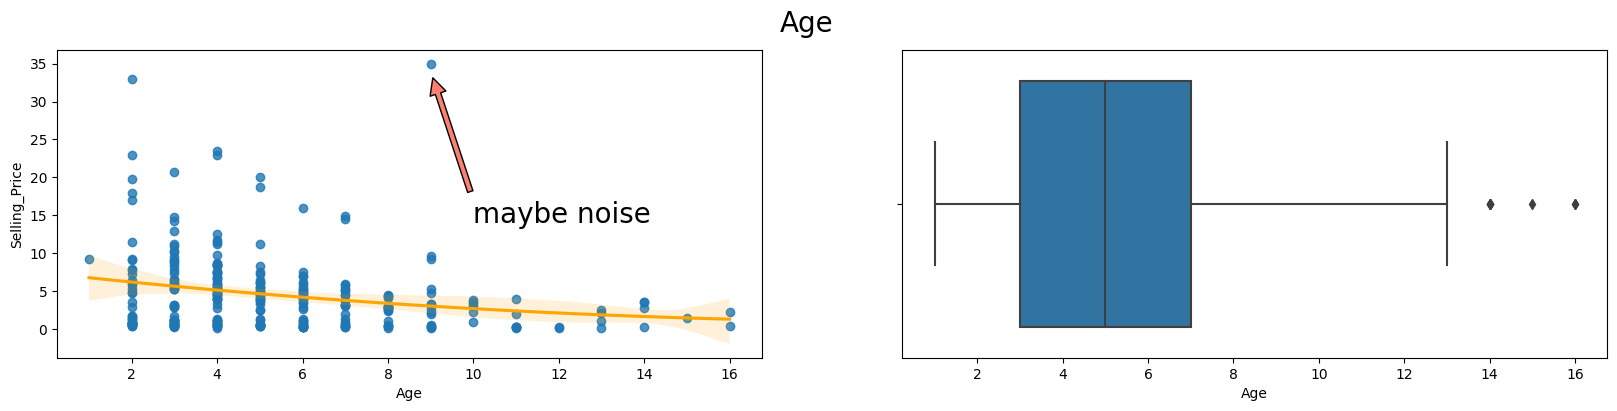

In [45]:
fig = plt.figure(figsize=(20, 4))
plt.suptitle('Age', size=20)
plt.subplot(1, 2, 1)
sns.regplot(x=df2.Age, y=df2.Selling_Price, data=df2, order=3, line_kws=dict(color="orange"))
plt.annotate('maybe noise', xy=(9,34),xytext=(10,14), arrowprops=dict(facecolor='salmon', shrink=0.05),fontsize=20)
plt.subplot(1, 2, 2)
ax = sns.boxplot(x=df2.Age, data=df2)
plt.show()

### some datas may look like a noise, but according to dataset, they cannot be considered noise even though they are far from the rest of the data.
### also a non-linear regression is visible

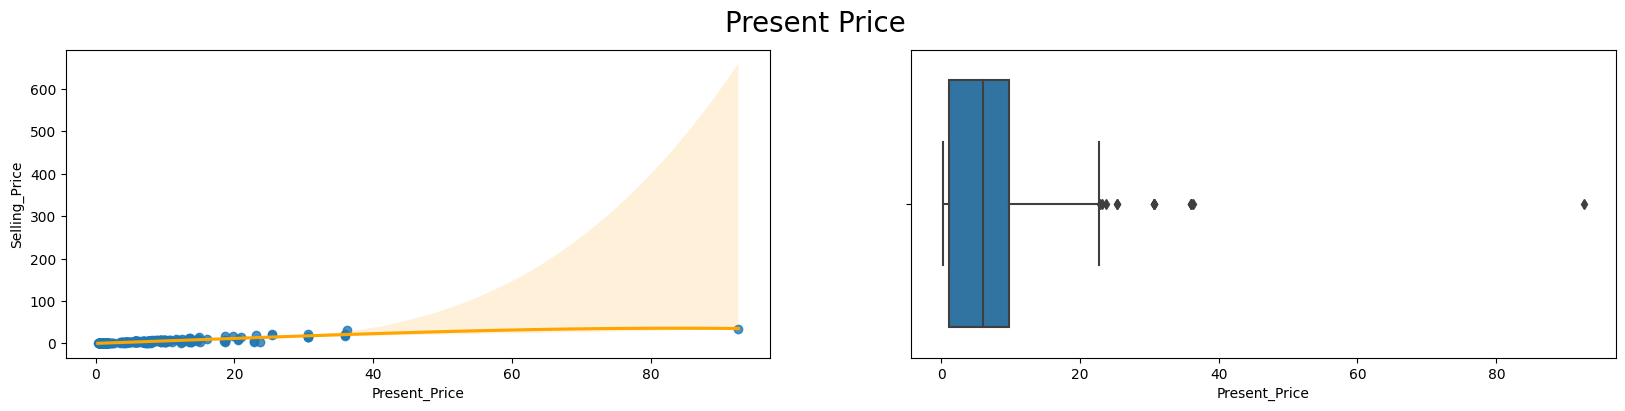

In [46]:
fig = plt.figure(figsize=(20, 4))
plt.suptitle('Present Price', size=20)
plt.subplot(1, 2, 1)
sns.regplot(x=df2.Present_Price, y=df2.Selling_Price, data=df2, order=3, line_kws=dict(color="orange"))
plt.subplot(1, 2, 2)
ax = sns.boxplot(x=df2.Present_Price, data=df2)
plt.show()

### we can't find any noise and as we can see there is a positive correlation between present price & selling price

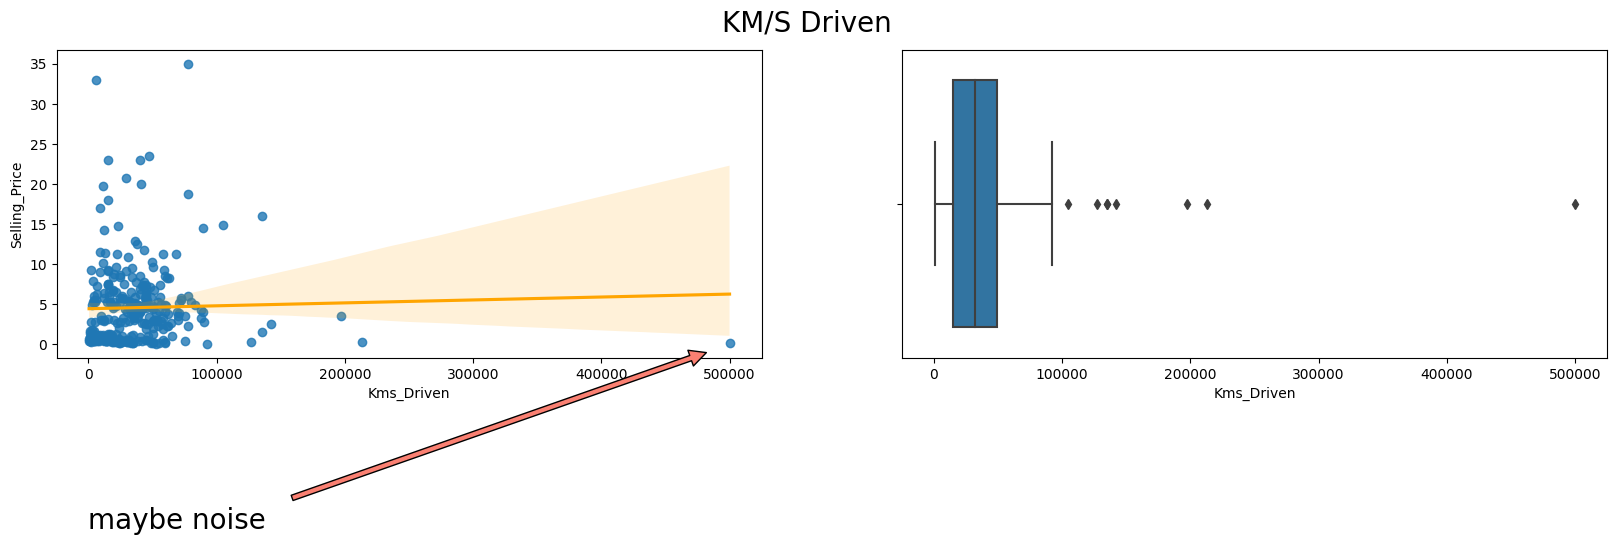

In [47]:
fig = plt.figure(figsize=(20, 4))
plt.suptitle('KM/S Driven', size=20)
plt.subplot(1, 2, 1)
sns.regplot(x=df2.Kms_Driven, y=df2.Selling_Price, data=df2, order=0, line_kws=dict(color="orange"))
plt.annotate('maybe noise', xy=(500000,0),xytext=(0,-23), arrowprops=dict(facecolor='salmon', shrink=-0.05),fontsize=20)
plt.subplot(1, 2, 2)
ax = sns.boxplot(x=df2.Kms_Driven, data=df2)
plt.show()

### we can see that one data is far away from others but we do the modeling once without removing possible noises and once with removing them.

In [48]:
df2

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
294,9.50,11.60,33988,3,2,2,0,3
295,4.00,5.90,60000,2,2,2,0,4
296,3.35,11.00,87934,2,2,2,0,10
297,11.50,12.50,9000,3,2,2,0,2


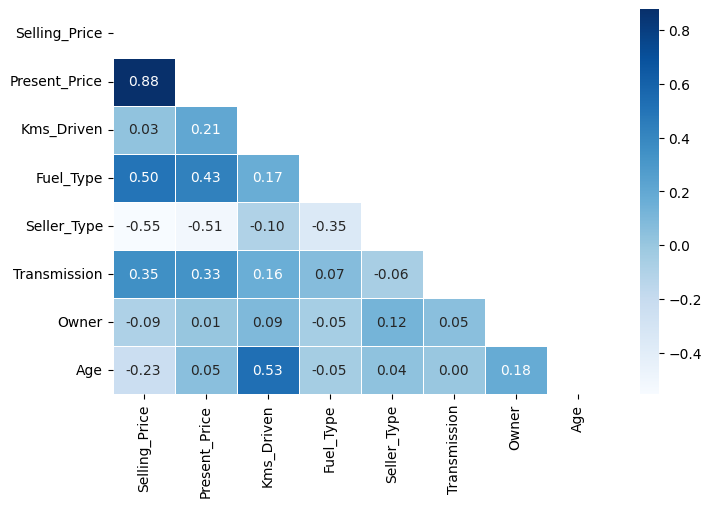

In [49]:
corr = df2.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Blues')
plt.show()

In [50]:
df2.corr()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
Selling_Price,1.000000,0.876378,0.028566,0.500292,-0.553851,0.348869,-0.087880,-0.234369
Present_Price,0.876378,1.000000,0.205253,0.431809,-0.511686,0.334265,0.009947,0.053563
Kms_Driven,0.028566,0.205253,1.000000,0.167287,-0.101030,0.163881,0.089367,0.525714
Fuel_Type,0.500292,0.431809,0.167287,1.000000,-0.347922,0.068618,-0.054174,-0.046210
Seller_Type,-0.553851,-0.511686,-0.101030,-0.347922,1.000000,-0.058669,0.123646,0.036820
Transmission,0.348869,0.334265,0.163881,0.068618,-0.058669,1.000000,0.052166,0.003434
Owner,-0.087880,0.009947,0.089367,-0.054174,0.123646,0.052166,1.000000,0.181639
Age,-0.234369,0.053563,0.525714,-0.046210,0.036820,0.003434,0.181639,1.000000


### present price has the most positive correlations with target by 0.88
### seller type has the most negative correlations with target by -0.55

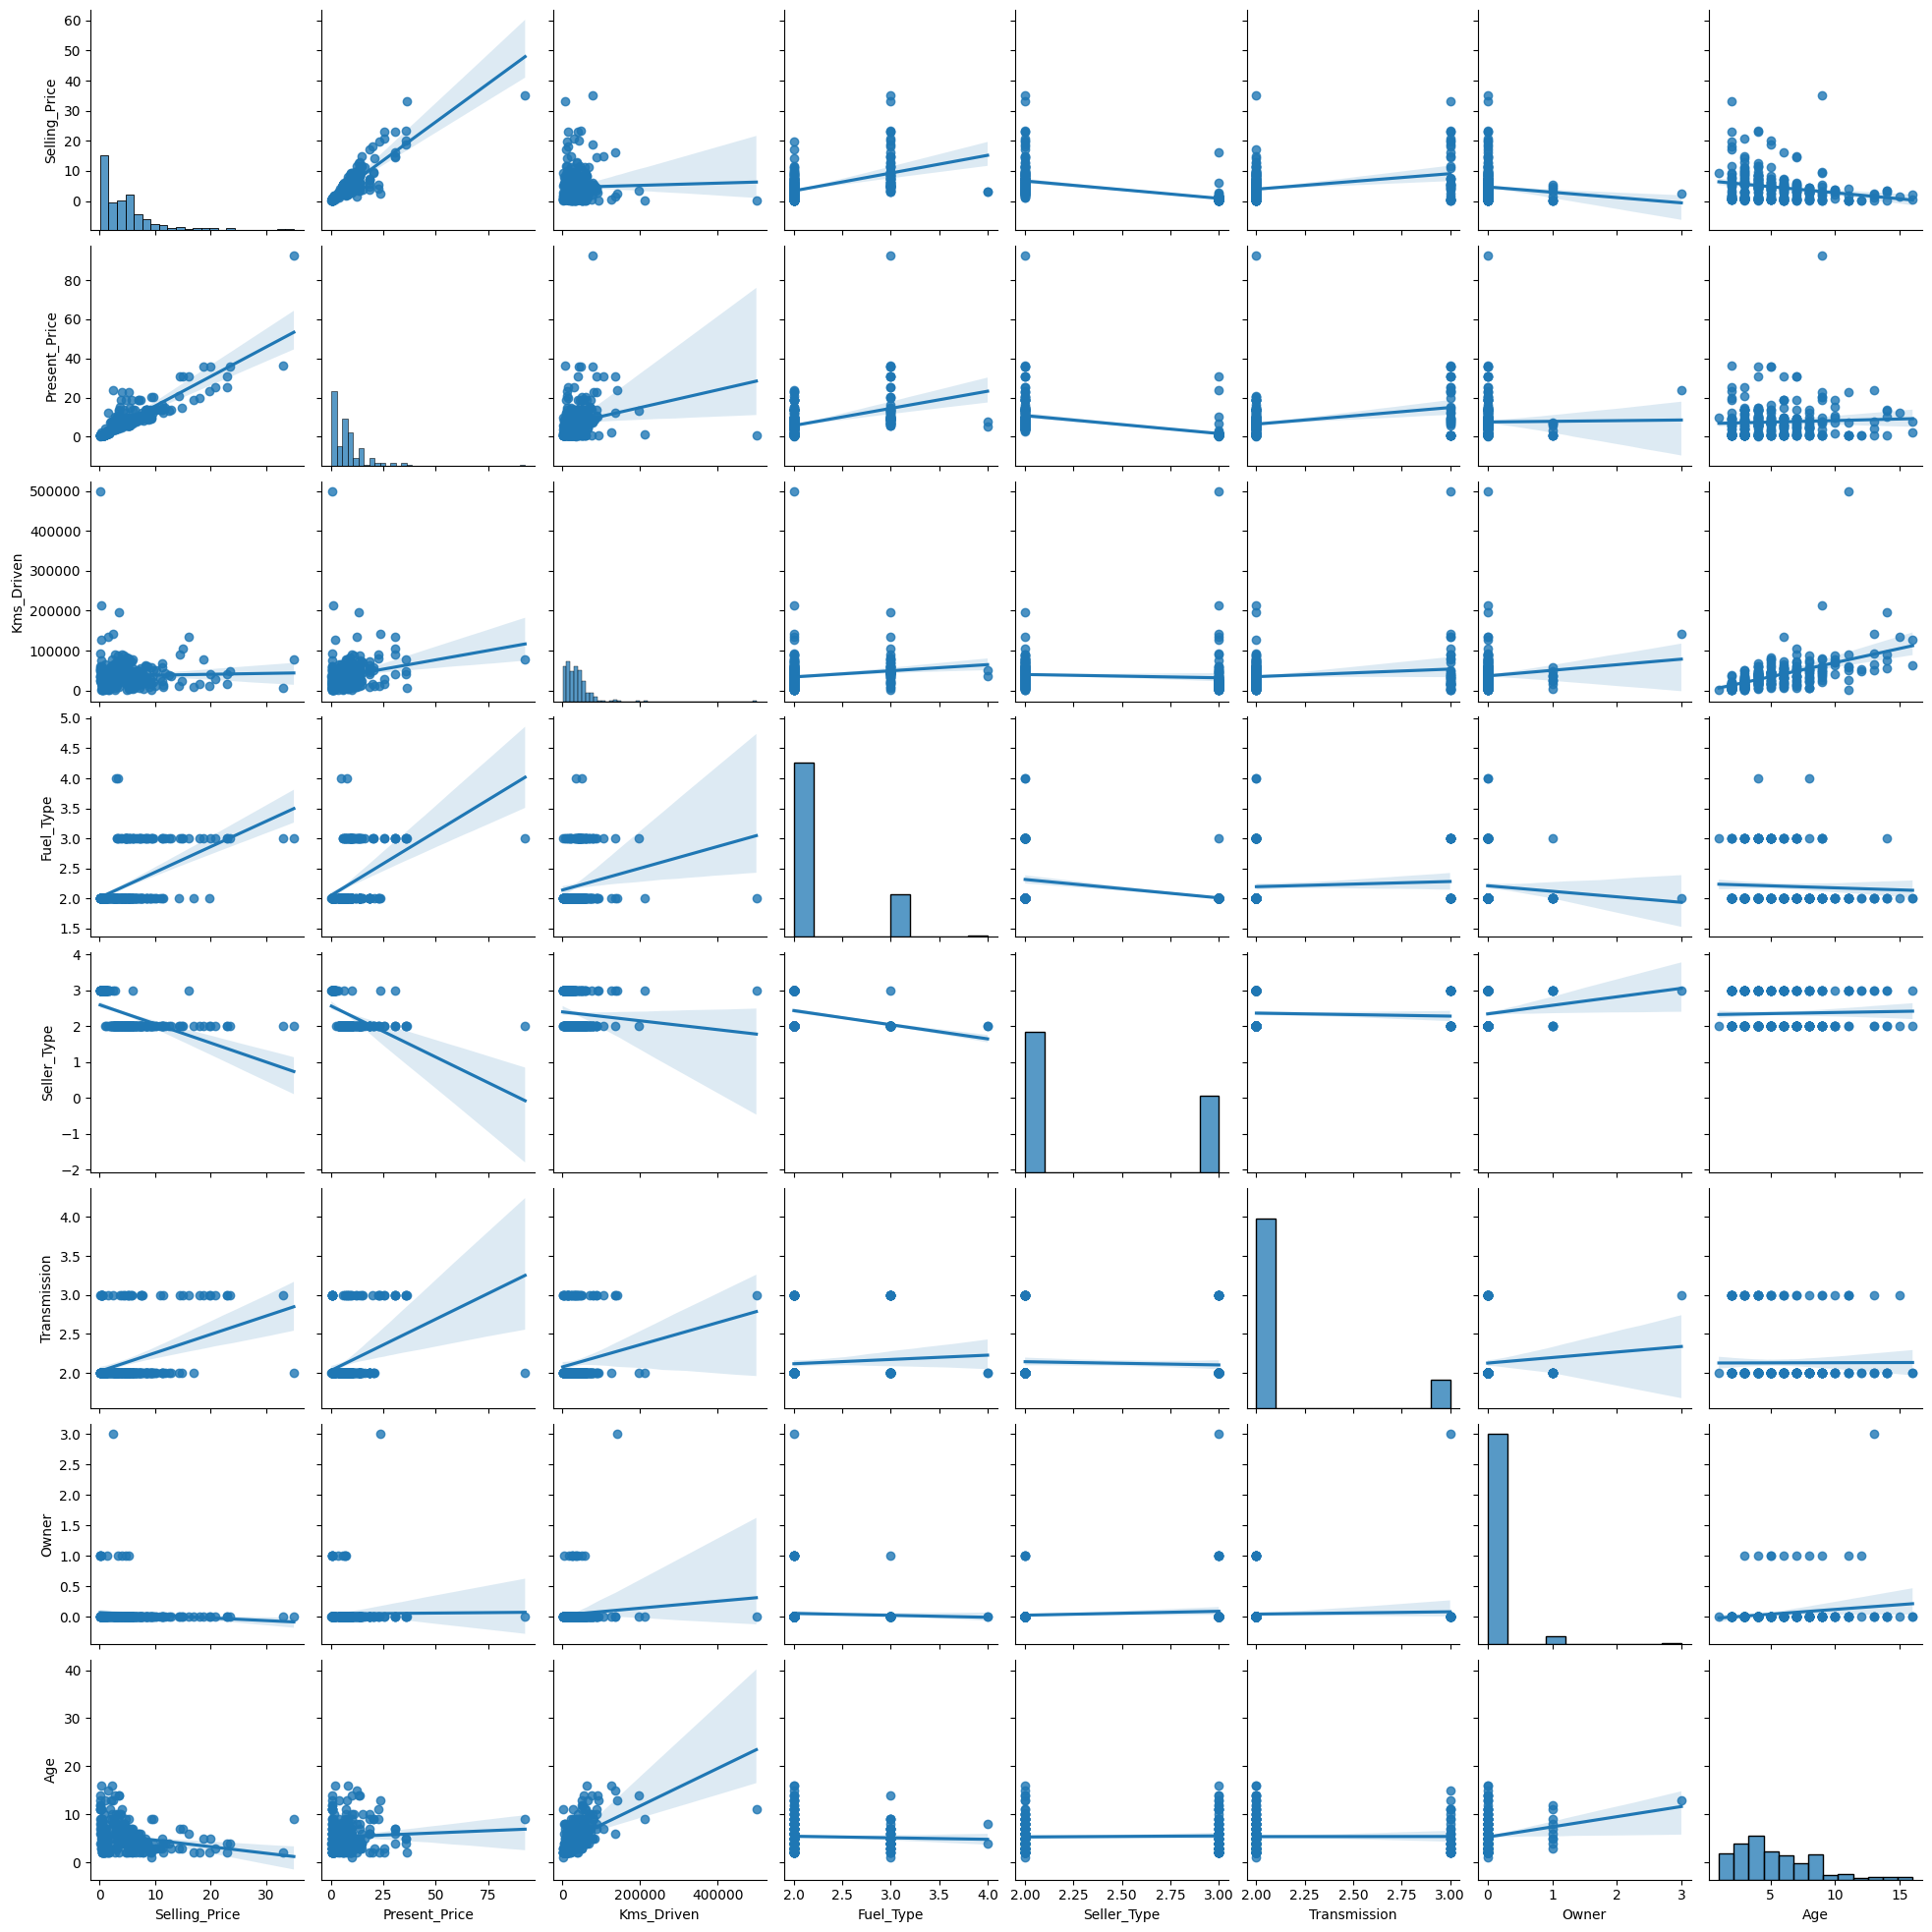

In [51]:
# realizing correlation between features and target by plots and using it in model equation.
data_p = df2[(df2.T != 0).any()]
sns.pairplot(data_p, vars= df2.columns, kind = 'reg')
plt.show()

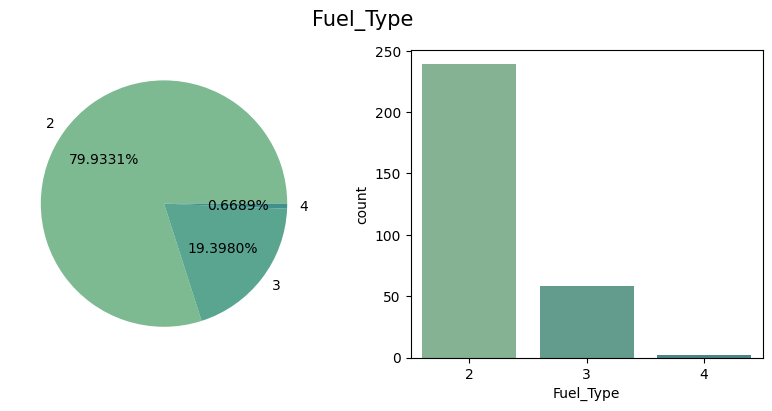

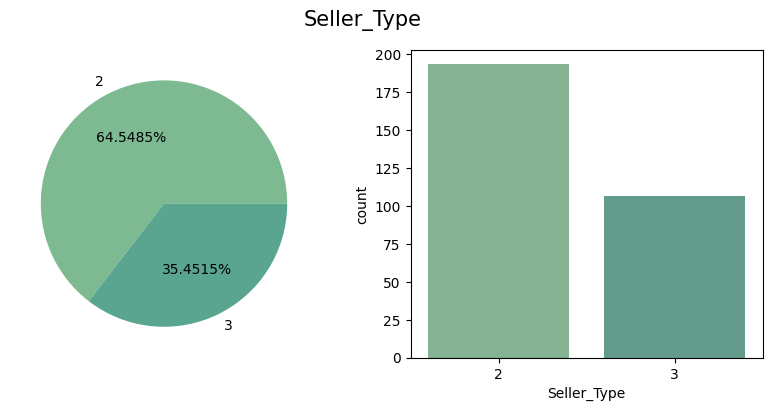

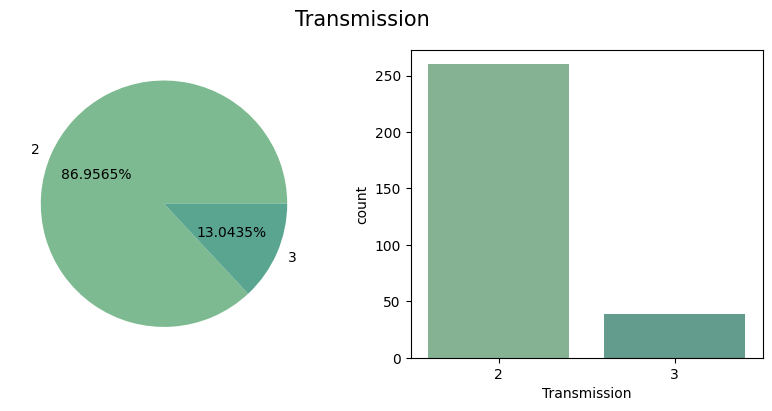

In [52]:
import seaborn as sns
classification= ['Fuel_Type','Seller_Type','Transmission']
sns.set_palette("crest")
for i, col in enumerate(classification):
    fig, axes = plt.subplots(1,2,figsize=(10,4))
    sns.countplot(data=df2, x=col, ax=axes[1])
    for container in axes[0].containers:
        axes[1].bar_label(container)
    slices = df2[col].value_counts().sort_index().values
    a = [var for var in df2[col].value_counts().sort_index().index]
    axes[0].pie(slices, labels=a, autopct='%1.4f%%')
    plt.suptitle(col, color='black',fontsize=15)
    plt.show()

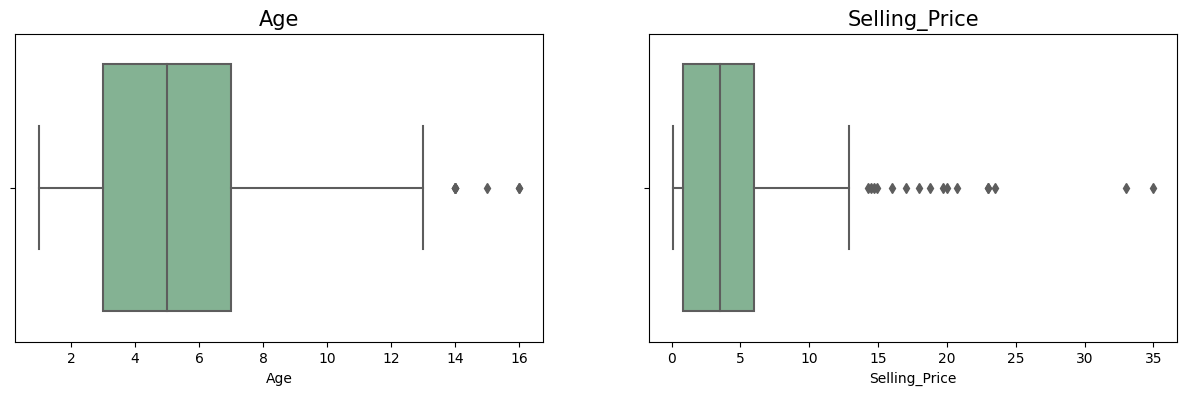

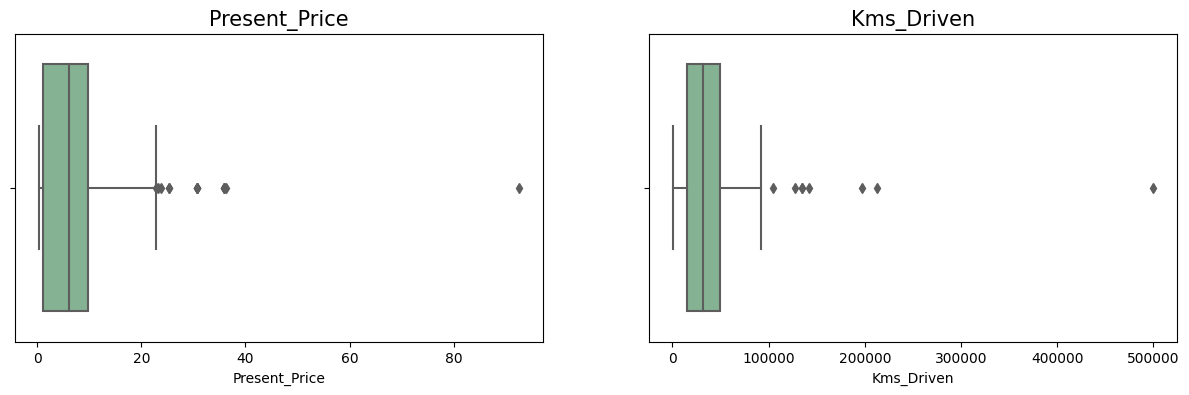

In [53]:
numerical = ['Age','Selling_Price','Present_Price','Kms_Driven']
i = 0
sns.set_palette("crest")
while i < 4:
    fig = plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.boxplot(x=numerical[i] ,data= df2)
    plt.title(numerical[i])
    plt.title(numerical[i],color='black',fontsize=15)
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=numerical[i] ,data= df2)
    plt.title(numerical[i])
    plt.title(numerical[i],color='black',fontsize=15)
    i += 1
    plt.show()


Age Statistics:
count: 299.00
mean: 5.38
std: 2.90
min: 1.00
25%: 3.00
50%: 5.00
75%: 7.00
max: 16.00



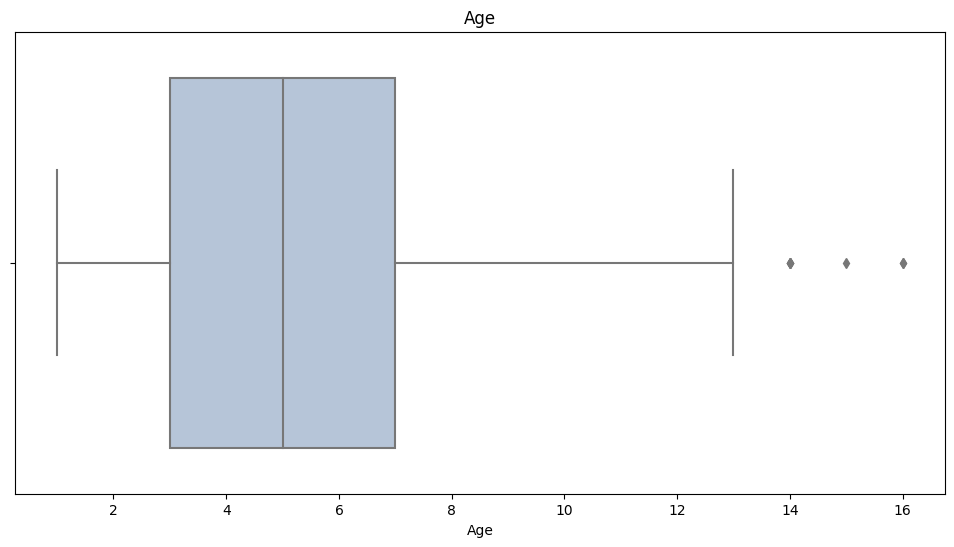


Selling_Price Statistics:
count: 299.00
mean: 4.59
std: 4.98
min: 0.10
25%: 0.85
50%: 3.51
75%: 6.00
max: 35.00



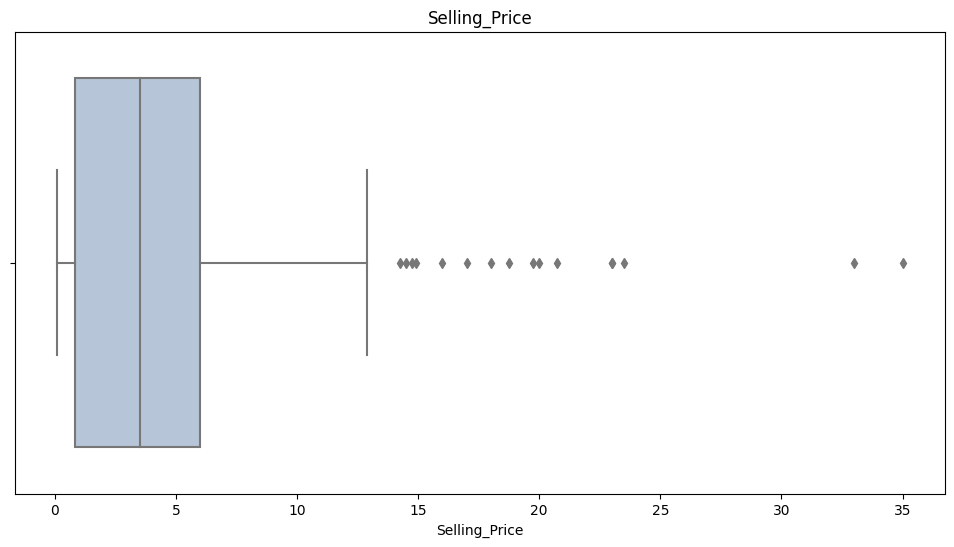


Present_Price Statistics:
count: 299.00
mean: 7.54
std: 8.57
min: 0.32
25%: 1.20
50%: 6.10
75%: 9.84
max: 92.60



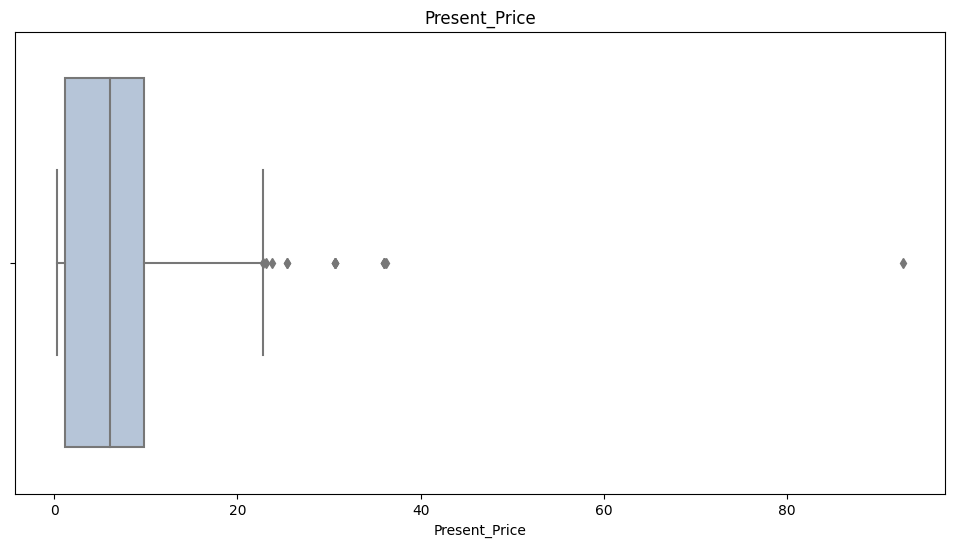


Kms_Driven Statistics:
count: 299.00
mean: 36916.75
std: 39015.17
min: 500.00
25%: 15000.00
50%: 32000.00
75%: 48883.50
max: 500000.00



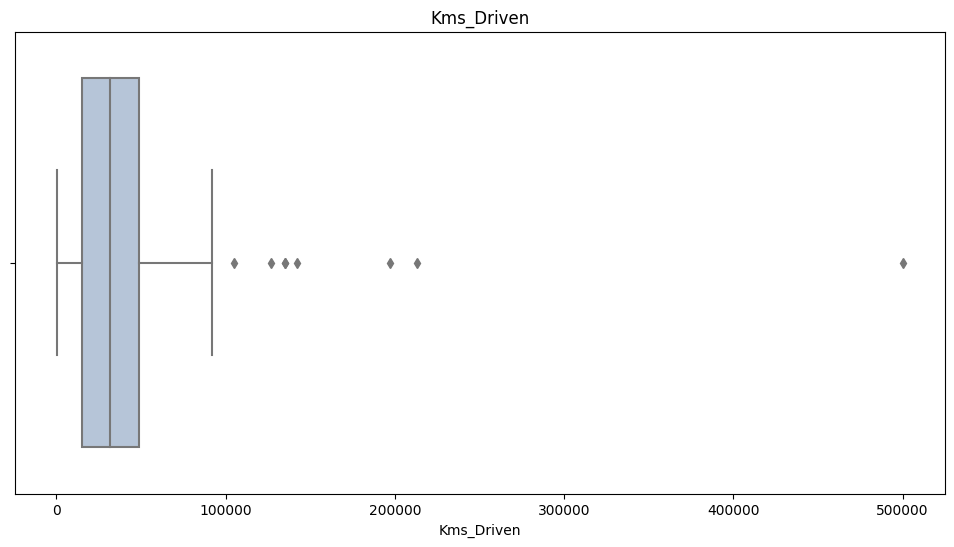

In [54]:
columns = ['Age','Selling_Price','Present_Price','Kms_Driven']
for column in columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=df2[column], color='lightsteelblue')
    plt.title(column)
    stats = df2[column].describe()
    stats_text = "\n".join([f"{key}: {value:.2f}" for key, value in stats.items()])
    print(f"\n{column} Statistics:\n{stats_text}\n")
    plt.show()

<Axes: xlabel='Selling_Price', ylabel='Density'>

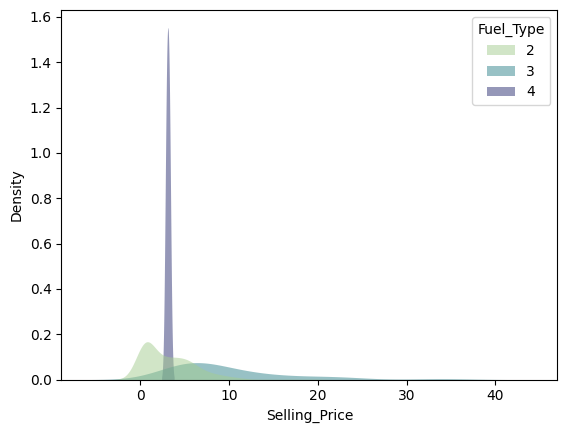

In [55]:
sns.kdeplot(data=df2, x="Selling_Price", hue="Fuel_Type",fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0)

<Axes: xlabel='Selling_Price', ylabel='Density'>

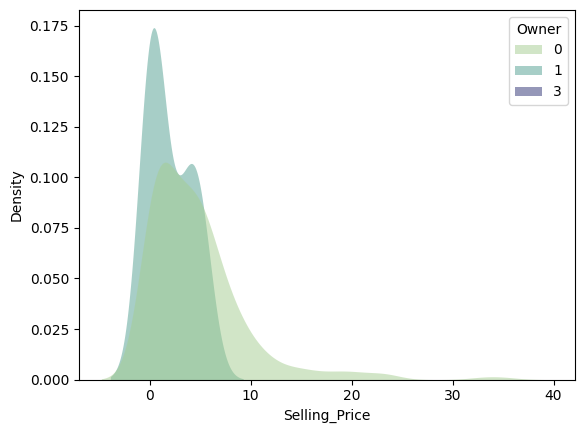

In [56]:
sns.kdeplot(data=df2, x="Selling_Price", hue="Owner",fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0)

<Axes: xlabel='Selling_Price', ylabel='Density'>

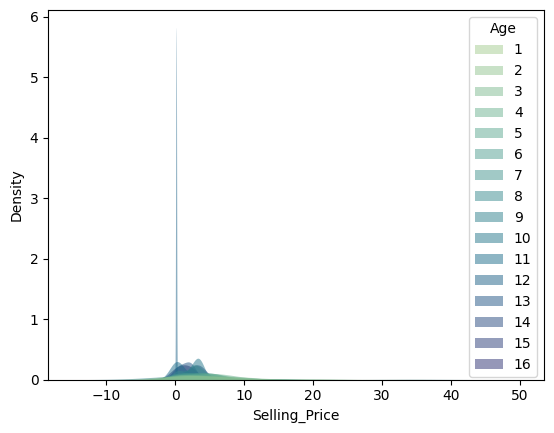

In [57]:
sns.kdeplot(data=df2, x="Selling_Price", hue="Age",fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0)

<Axes: xlabel='Selling_Price', ylabel='Density'>

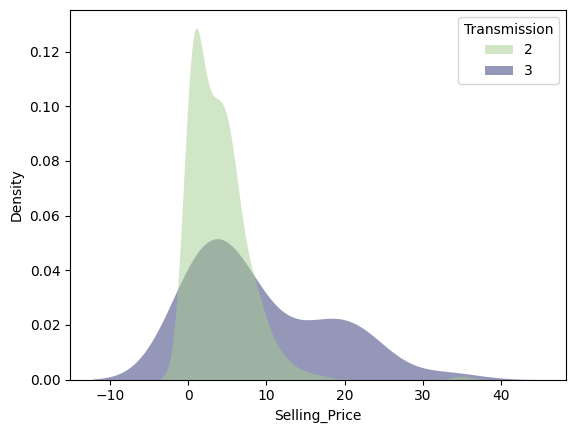

In [58]:
sns.kdeplot(data=df2, x="Selling_Price", hue="Transmission",fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0)

<Axes: xlabel='Selling_Price', ylabel='Density'>

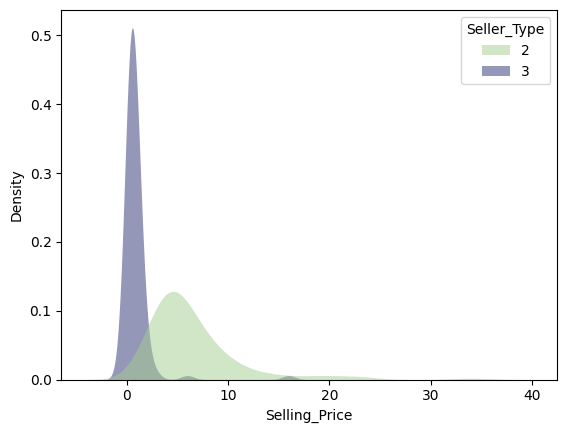

In [59]:
sns.kdeplot(data=df2, x="Selling_Price", hue="Seller_Type",fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0)

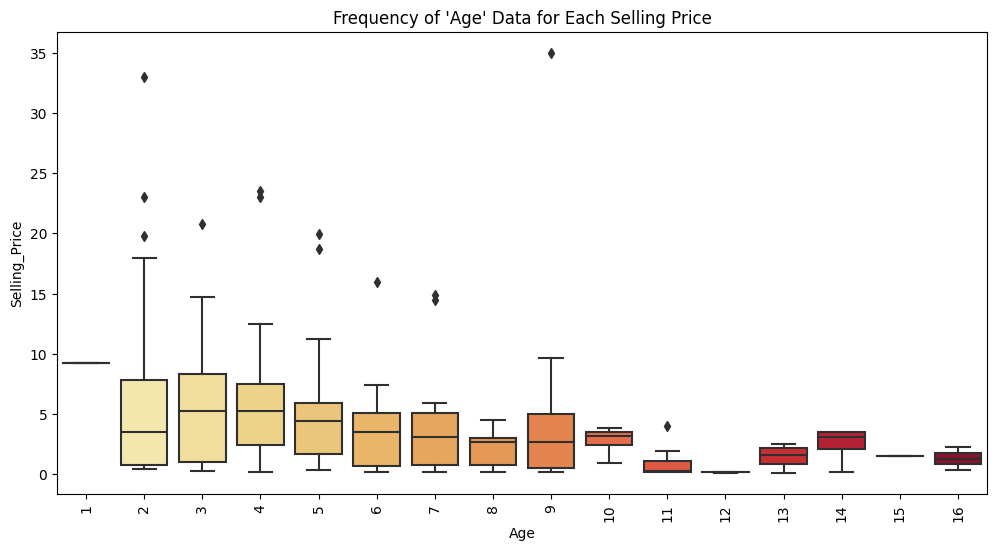

In [60]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Age', y='Selling_Price', data=df2, palette='YlOrRd')
plt.xticks(rotation=90) 
plt.title('''Frequency of 'Age' Data for Each Selling Price''')
plt.show()

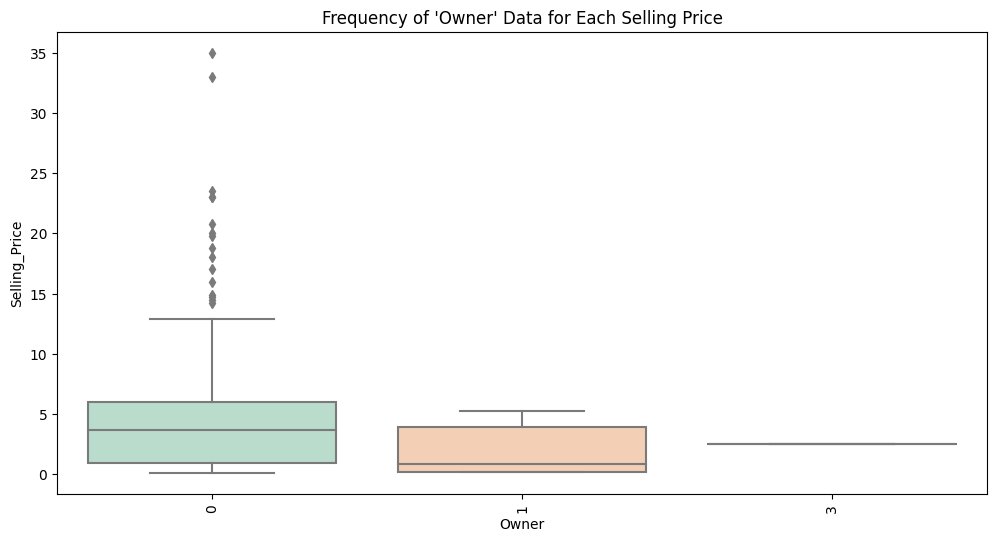

In [61]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Owner', y='Selling_Price', data=df2, palette='Pastel2')
plt.xticks(rotation=90) 
plt.title('''Frequency of 'Owner' Data for Each Selling Price''')
plt.show()

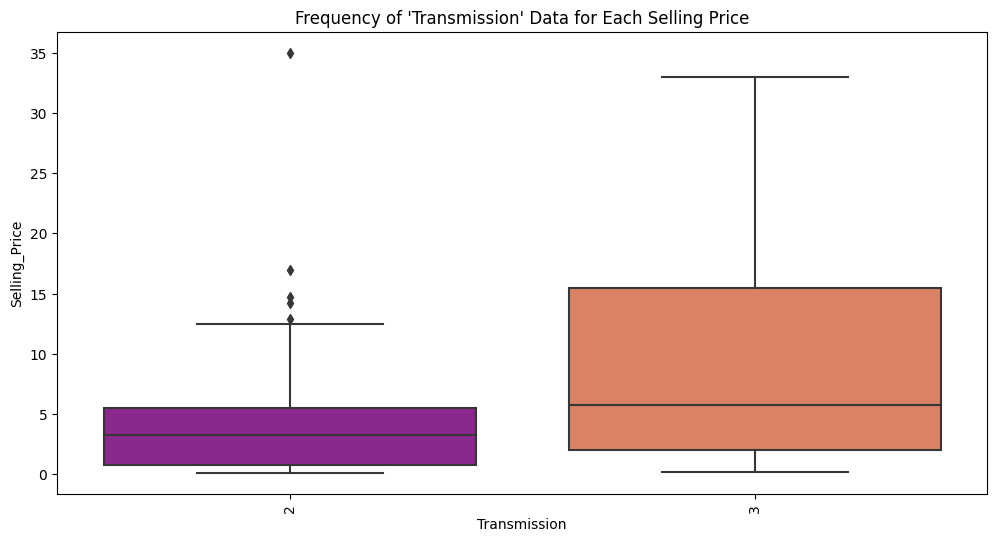

In [62]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Transmission', y='Selling_Price', data=df2, palette='plasma')
plt.xticks(rotation=90) 
plt.title('''Frequency of 'Transmission' Data for Each Selling Price''')
plt.show()

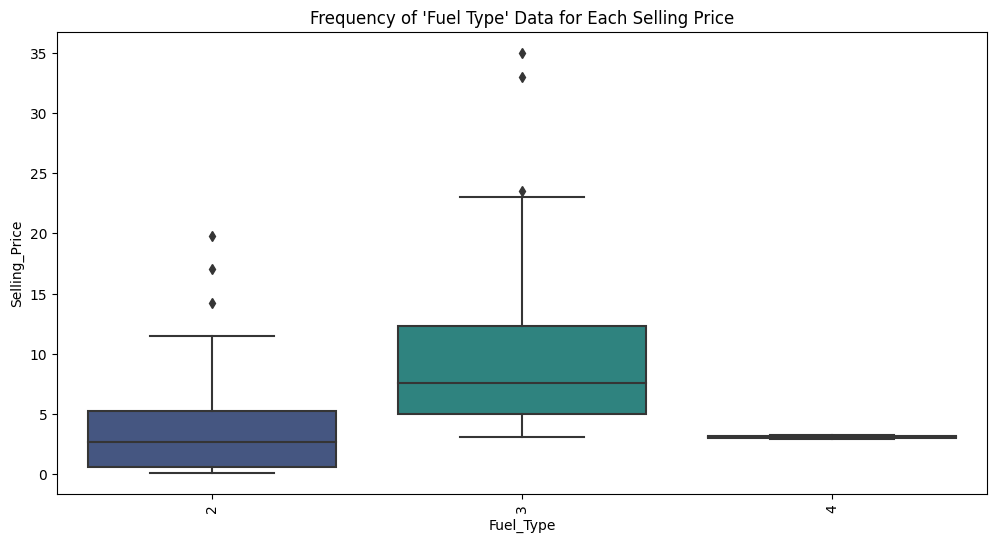

In [63]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df2, palette='viridis')
plt.xticks(rotation=90) 
plt.title('''Frequency of 'Fuel Type' Data for Each Selling Price''')
plt.show()

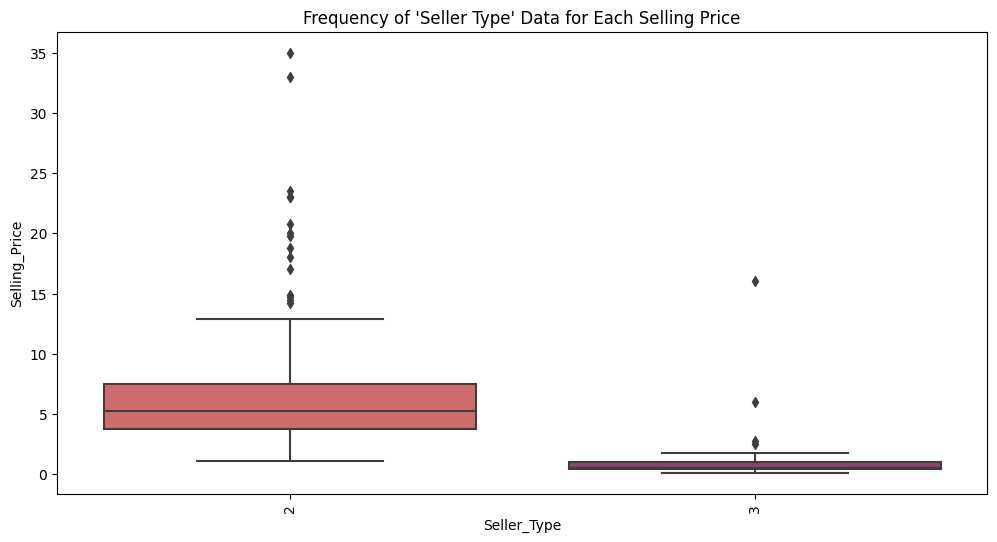

In [64]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Seller_Type', y='Selling_Price', data=df2, palette='flare')
plt.xticks(rotation=90) 
plt.title('''Frequency of 'Seller Type' Data for Each Selling Price''')
plt.show()

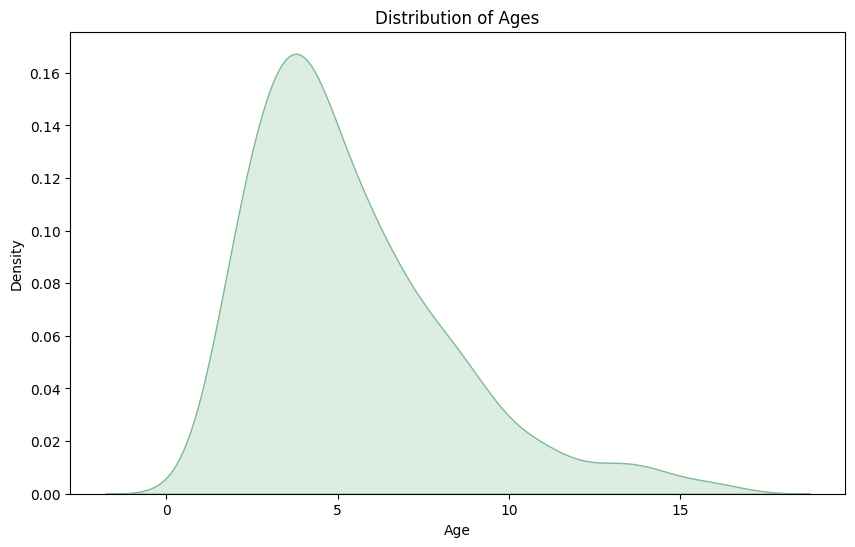

In [65]:
plt.figure(figsize = (10,6))
sns.kdeplot(data=df2 , x = 'Age' , fill = True) 
plt.title('Distribution of Ages')
plt.show()

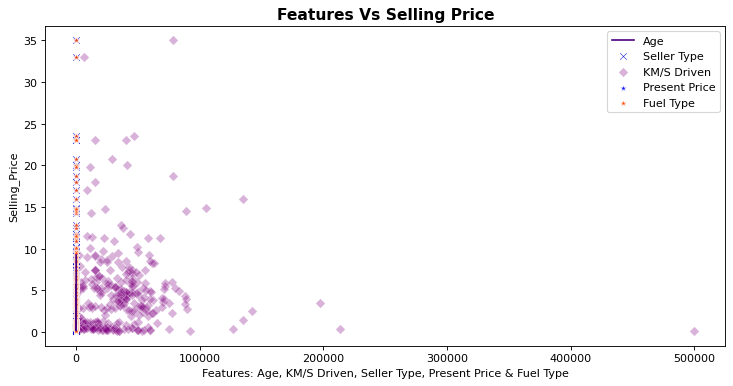

In [66]:
plt.figure(figsize=(10,5), dpi=80)
sns.lineplot(data=df2, x='Age', y='Selling_Price', label='Age', color='indigo')
sns.scatterplot(data=df2, x='Seller_Type', y='Selling_Price', label=f'Seller Type', marker="x", alpha=0.9, color='mediumblue')
sns.scatterplot(data=df2, x='Kms_Driven', y='Selling_Price', label=f'KM/S Driven', marker="D", alpha=0.3, color='purple')
sns.scatterplot(data=df2, x='Present_Price', y='Selling_Price', label=f'Present Price', marker="*", alpha=0.9, color='blue')
sns.scatterplot(data=df2, x='Fuel_Type', y='Selling_Price', label=f'Fuel Type', marker="*", alpha=0.9, color='orangered')
plt.title('Features Vs Selling Price', fontsize=14, fontweight='bold')
plt.xlabel('Features: Age, KM/S Driven, Seller Type, Present Price & Fuel Type')
plt.legend(loc='best')
plt.gcf().subplots_adjust(left=0.1, right=0.95, top=0.90, bottom=0.10)
plt.show()

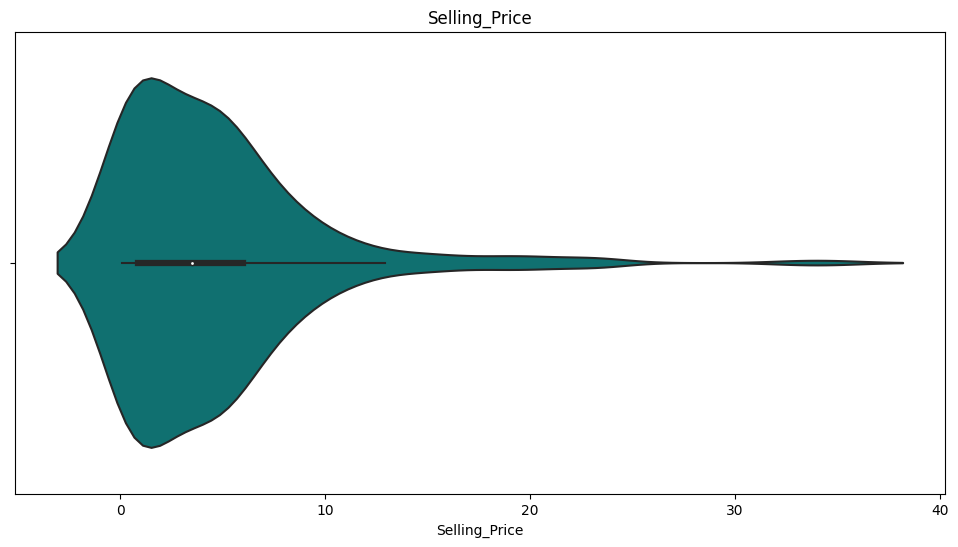

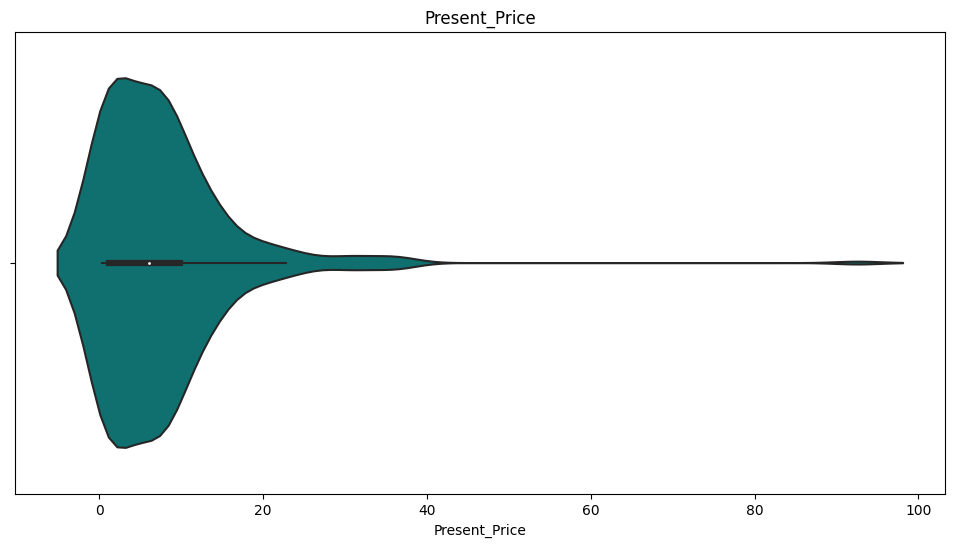

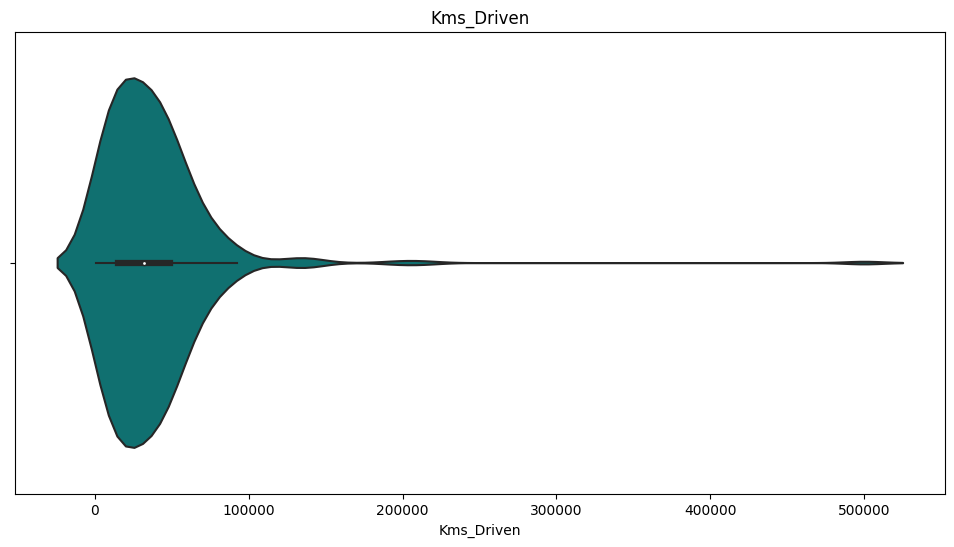

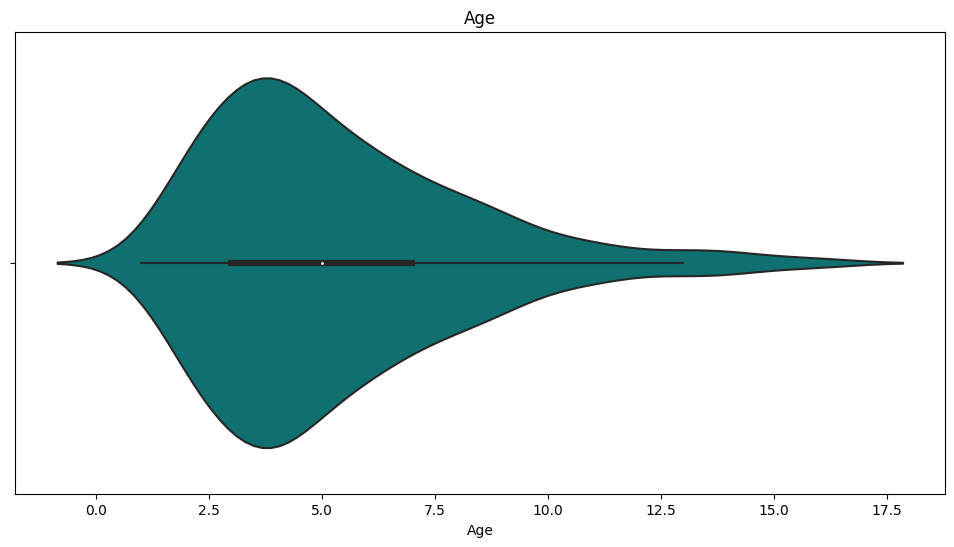

In [67]:
columns = ['Selling_Price','Present_Price','Kms_Driven', 'Age']
for column in columns:
    plt.figure(figsize=(12,6))
    sns.violinplot(x=df2[column], color='teal')
    plt.title(column)
    plt.show()

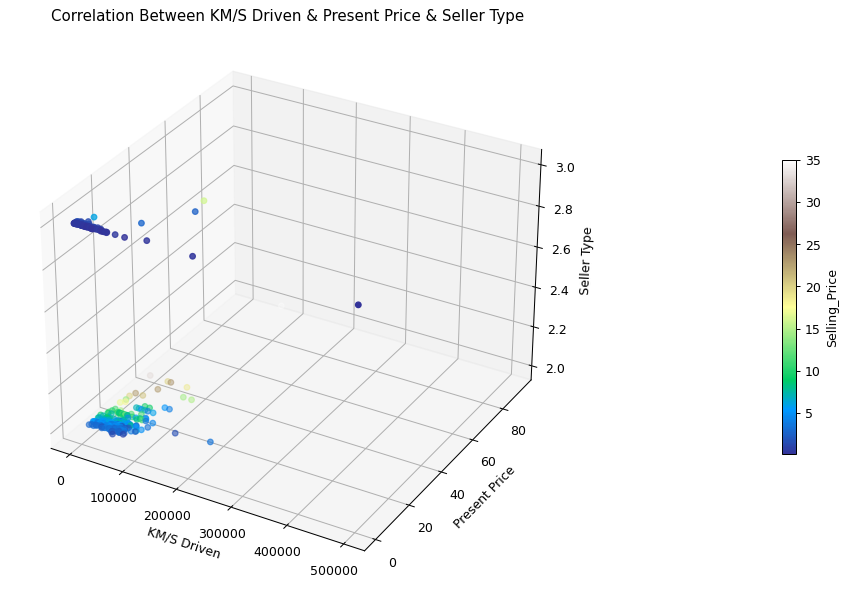

In [68]:
fig = plt.figure(figsize=(10, 8.5),dpi=90)
ax = fig.add_subplot(111,projection='3d')
p1 = ax.scatter(df2['Kms_Driven'], df2['Present_Price'], df2['Seller_Type'],c=df2['Selling_Price'],cmap='terrain')
fig.colorbar(p1, shrink=0.5,label='Selling_Price',anchor=(2,0.5))
ax.set_xlabel("KM/S Driven")
ax.set_ylabel("Present Price")
ax.set_zlabel("Seller Type")
ax.set_title("Correlation Between KM/S Driven & Present Price & Seller Type",fontdict={'fontsize': 12})
fig.show()

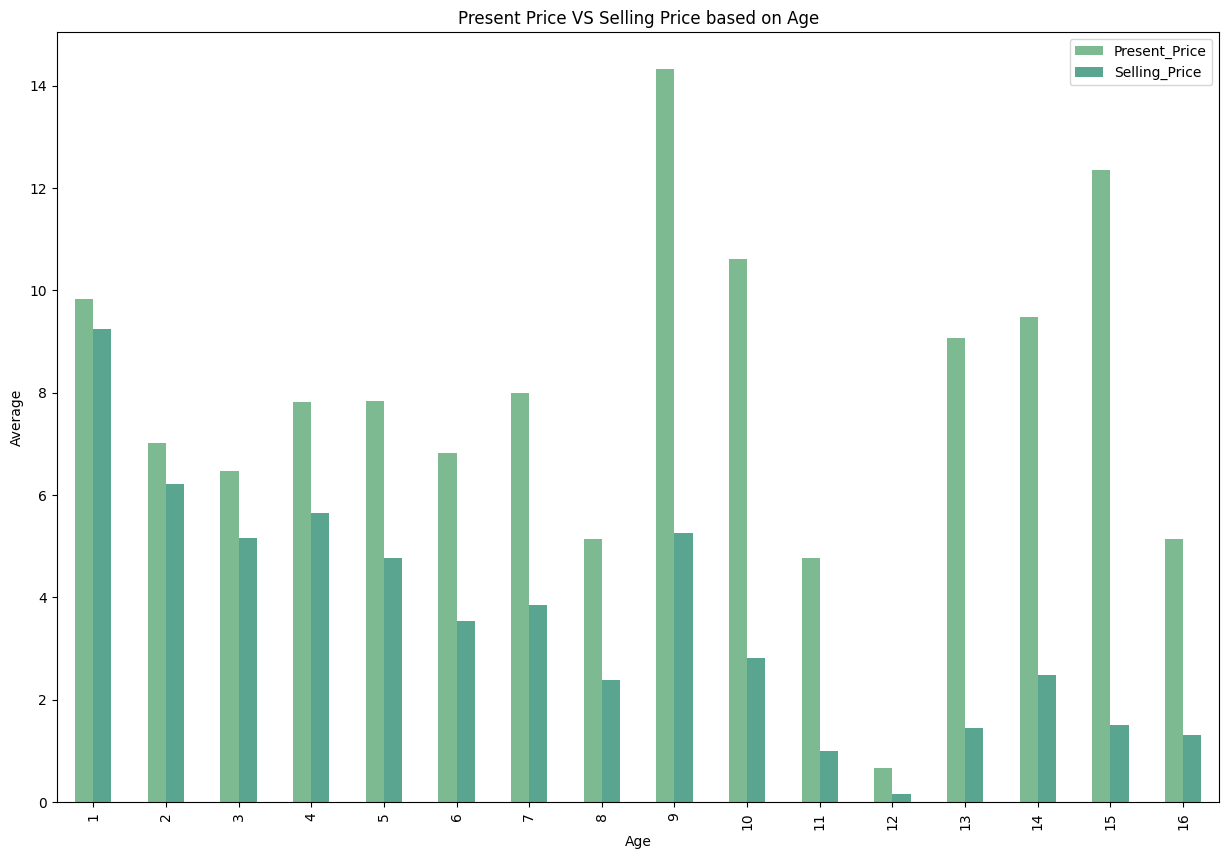

In [69]:
Means = df2.groupby('Age')[['Present_Price', 'Selling_Price']].mean()
Means.plot(kind='bar', figsize=(15, 10))
plt.title("Present Price VS Selling Price based on Age")
plt.xlabel('Age')
plt.ylabel('Average')
plt.show()

<a id="ml"></a>
# <p style="background-color:lightsteelblue;font-family:newtimeroman;font-size:100%;color:blackData Description ;text-align:center;border-squar:15px 50px; padding:7px">ML: Linear Regression</p>

In [70]:
df4=df2.copy()

In [71]:
df4

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
294,9.50,11.60,33988,3,2,2,0,3
295,4.00,5.90,60000,2,2,2,0,4
296,3.35,11.00,87934,2,2,2,0,10
297,11.50,12.50,9000,3,2,2,0,2


In [72]:
# normalizing by MinMaxScaler (Present_Price, Kms_Drvien & Age) (other features are already between 1 to 4)
scaler = MinMaxScaler(feature_range=(1,4))
nrm = scaler.fit_transform(df4[['Present_Price', 'Kms_Driven','Age']])
nrm = pd.DataFrame(nrm, columns=['Present_Price', 'Kms_Driven','Age'])
nrm = pd.concat([nrm, df4[['Fuel_Type','Seller_Type','Transmission','Owner', 'Selling_Price']]], axis=1)
nrm

,Present_Price,Kms_Driven,Age,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,1.171326,1.159159,1.8,2,2,2,0,3.35
1,1.299740,1.255255,2.0,3,2,2,0,4.75
2,1.309818,1.038438,1.2,2,2,2,0,7.25
3,1.124512,1.028228,2.4,2,2,2,0,2.85
4,1.212939,1.251952,1.8,3,2,2,0,4.60
...,...,...,...,...,...,...,...,...
294,1.366710,1.201129,1.4,3,2,2,0,9.50
295,1.181404,1.357357,1.6,2,2,2,0,4.00
296,1.347204,1.525129,2.8,2,2,2,0,3.35
297,1.395969,1.051051,1.2,3,2,2,0,11.50


In [73]:
CV = []
R2_train = []
R2_test = []
MAE_train = []
MAE_test = []
def modeling(x, y, k,test_size): # modeling to avoid extra coding
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)  # spilting train_test
    model = LinearRegression()   # fit model
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    # R2 of train set - MAE/MSE of train set - R2 of test set - MAE and MSE of train set
    r2_train_model = metrics.r2_score(y_train, y_pred_train)
    mae_train_model = metrics.mean_absolute_error(y_train, y_pred_train)
    y_pred_test = model.predict(x_test)
    r2_test_model = metrics.r2_score(y_test, y_pred_test) 
    mae_test_model = metrics.mean_absolute_error(y_test, y_pred_test)
    mse_test_model = metrics.mean_squared_error(y_test, y_pred_test)
    kf = KFold(k)    # using cross validation
    cross_val = cross_val_score(model, x_train, y_train, cv=kf, scoring='r2')
    cv_mean = np.mean(cross_val)
    print("TRAIN'S SHAPE: ",x_train.shape, y_train.shape)
    print("TEST'S SHAPE: ",x_test.shape, y_test.shape)
    print("TRAIN'S MAE :", round(mae_train_model, 2))
    print("TEST'S MAE :", round(mae_test_model, 2))
    print("TRAIN'S CV Scores :", cross_val)
    print("TRAIN'S CV Mean :", round(cv_mean, 2))
    print("\33[92m     TRAIN'S R2-score :", round(r2_train_model, 4))
    print("     TEST'S R2-score :", round(r2_test_model, 4))
    R2_train.append(round(r2_train_model, 2))
    MAE_train.append(round(mae_train_model, 2))
    R2_test.append(round(r2_test_model, 2))
    MAE_test.append(round(mae_test_model, 2))
    CV.append(round(cv_mean, 2))
    fig, ax = plt.subplots(1,2,figsize = (15,4))
    ax[0].set_title('Residual (Error) Plot/Train Samples', fontsize=12)
    sns.histplot((y_train-y_pred_train), kde=True, ax = ax[0], palette = "crest")
    ax[0].set_xlabel('Y TRAIN / Y PREDICTION TRAIN')
    ax[1].set_title('MAE TEST vs MAE TRAIN', fontsize=12)
    sns.lineplot(data=pd.DataFrame({'MAE TRAIN': MAE_train, 'MAE TEST': MAE_test}), markers=True, palette=['g', 'y'], linewidth=2.5)
    ax[1].set_xlabel('M')
    ax[1].set_ylabel('MAE')
    plt.grid()
    plt.show()
    columns = ['INTERCEPT'] + x.columns.to_list()
    slope_table = pd.DataFrame({'COLUMNS': columns})
    slope = [i for i in model.intercept_] + model.coef_.tolist()[0]
    slope_table = slope_table.join(pd.Series(slope, name='WEIGHT/SLOPE/COEFFICIENT'))
    return slope_table

In [74]:
# first model (by all feature & 1 dimension)
nrm1 = nrm.copy()
x = nrm1.drop('Selling_Price', axis='columns')
y = nrm1.Selling_Price.values.reshape(-1,1)

TRAIN'S SHAPE:  (239, 7) (239, 1)
TEST'S SHAPE:  (60, 7) (60, 1)
TRAIN'S MAE : 1.12
TEST'S MAE : 1.31
TRAIN'S CV Scores : [0.84973497 0.77107399 0.75196277 0.80308646 0.91478664 0.86328082
 0.67570893 0.8192159  0.5525283  0.88151723]
TRAIN'S CV Mean : 0.79
     TRAIN'S R2-score : 0.888
     TEST'S R2-score : 0.7472


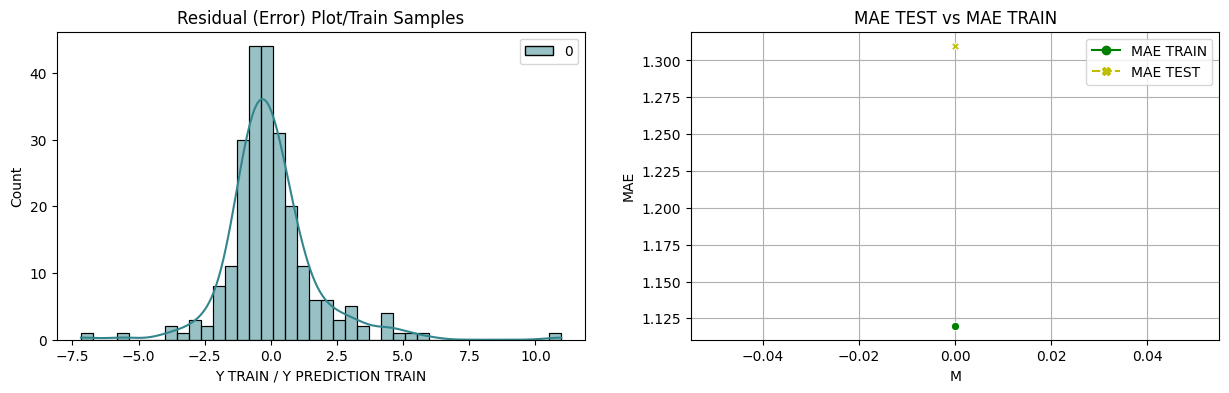

,COLUMNS,WEIGHT/SLOPE/COEFFICIENT
0,INTERCEPT,-8.574350
1,Present_Price,13.688396
2,Kms_Driven,-3.224315
3,Age,-1.552235
4,Fuel_Type,1.609334
5,Seller_Type,-1.400467
6,Transmission,1.365627
7,Owner,-0.922583


In [75]:
# we create model by spliting data to test & train with test size of 0.2
modeling(x, y, 10, 0.2)

In [76]:
# replacing log10 of Age & Kms_Driven to improve model
nrm1['logAge'] = np.log10(nrm1.Age)
nrm1['logKMSDriven'] = np.log10(nrm1.Kms_Driven)
x = nrm1.drop(['Selling_Price','Age','Kms_Driven'], axis='columns')
y = nrm1.Selling_Price.values.reshape(-1,1)

TRAIN'S SHAPE:  (239, 7) (239, 1)
TEST'S SHAPE:  (60, 7) (60, 1)
TRAIN'S MAE : 1.13
TEST'S MAE : 1.24
TRAIN'S CV Scores : [0.85655554 0.76434231 0.76415239 0.81007488 0.91572294 0.87793733
 0.67163674 0.82470042 0.62567422 0.87843214]
TRAIN'S CV Mean : 0.8
     TRAIN'S R2-score : 0.8918
     TEST'S R2-score : 0.804


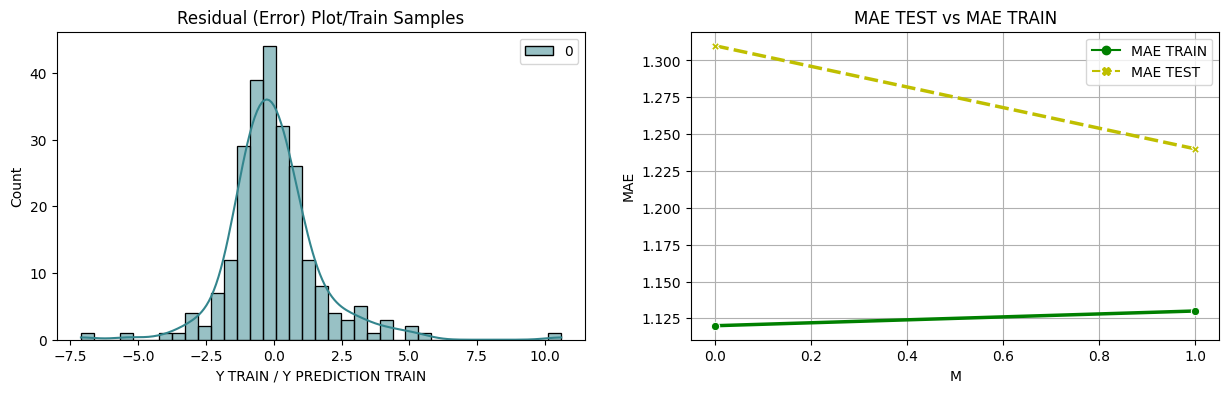

,COLUMNS,WEIGHT/SLOPE/COEFFICIENT
0,INTERCEPT,-12.380829
1,Present_Price,13.689644
2,Fuel_Type,1.683562
3,Seller_Type,-1.479346
4,Transmission,1.253303
5,Owner,-0.911646
6,logAge,-7.614506
7,logKMSDriven,-10.253951


In [77]:
modeling(x,y,10,0.2)

In [78]:
# combine Present_price & Age
nrm1['Precent Price & log Age'] = nrm1.Present_Price * nrm1.logAge 
x = nrm1.drop(['Selling_Price','Age','Kms_Driven'], axis='columns')
y = nrm1.Selling_Price.values.reshape(-1,1)

TRAIN'S SHAPE:  (239, 8) (239, 1)
TEST'S SHAPE:  (60, 8) (60, 1)
TRAIN'S MAE : 0.52
TEST'S MAE : 0.64
TRAIN'S CV Scores : [0.98984313 0.95543059 0.85630291 0.91702458 0.98745811 0.97924908
 0.94288161 0.95068574 0.95164668 0.94566941]
TRAIN'S CV Mean : 0.95
     TRAIN'S R2-score : 0.9764
     TEST'S R2-score : 0.9545


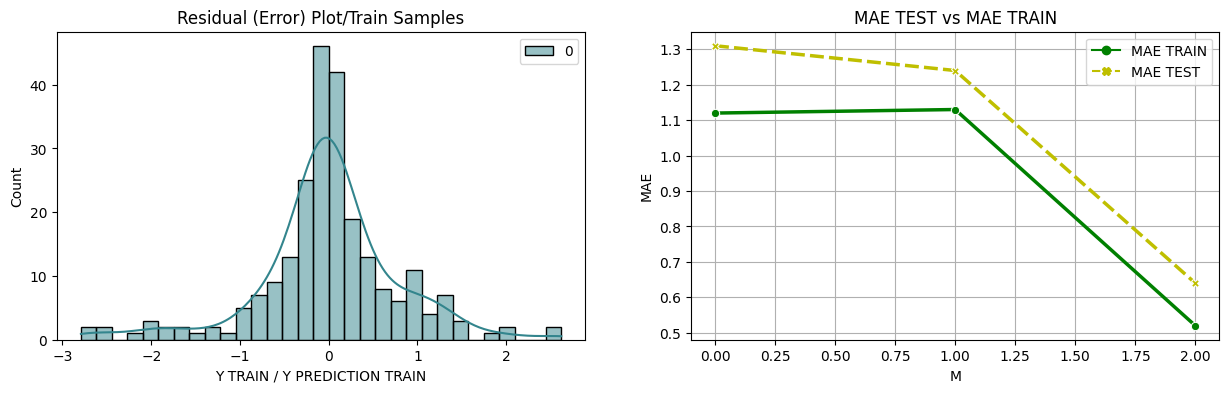

,COLUMNS,WEIGHT/SLOPE/COEFFICIENT
0,INTERCEPT,-29.999859
1,Present_Price,29.531293
2,Fuel_Type,0.901001
3,Seller_Type,-0.232303
4,Transmission,-0.156414
5,Owner,-0.248852
6,logAge,46.226954
7,logKMSDriven,-4.358215
8,Precent Price & log Age,-45.462305


In [79]:
modeling(x,y,10, 0.2)

In [80]:
# combine of Present_Price & Fuel_Type
nrm1['Precent Price & Fuel'] = (nrm1.Present_Price) * nrm1.Fuel_Type
x = nrm1.drop(['Selling_Price','Age','Kms_Driven'], axis='columns')
y = nrm1.Selling_Price.values.reshape(-1,1)

TRAIN'S SHAPE:  (239, 9) (239, 1)
TEST'S SHAPE:  (60, 9) (60, 1)
TRAIN'S MAE : 0.5
TEST'S MAE : 0.55
TRAIN'S CV Scores : [0.99310903 0.96204282 0.91001149 0.92858317 0.98441034 0.98181864
 0.9753808  0.95008328 0.93695282 0.95919922]
TRAIN'S CV Mean : 0.96
     TRAIN'S R2-score : 0.9798
     TEST'S R2-score : 0.9682


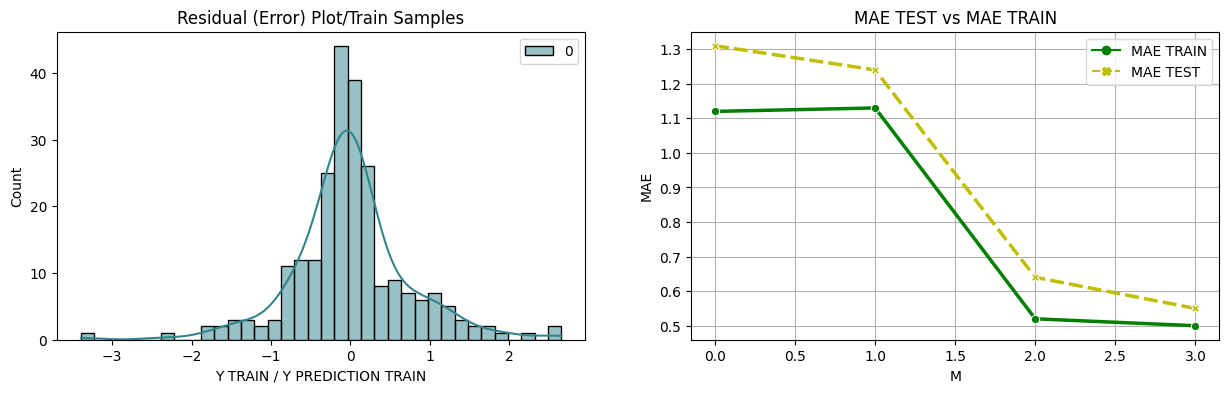

,COLUMNS,WEIGHT/SLOPE/COEFFICIENT
0,INTERCEPT,-17.479147
1,Present_Price,20.847898
2,Fuel_Type,-3.460184
3,Seller_Type,-0.821431
4,Transmission,-0.127317
5,Owner,0.073498
6,logAge,47.961604
7,logKMSDriven,-2.885961
8,Precent Price & log Age,-47.155112
9,Precent Price & Fuel,3.280685


In [81]:
modeling(x,y,10,0.2)

### model 4's R2 Score is 0.97 (almost 0.98 & not overfit or underfit)

In [82]:
# delete previous data
R2_train = []
R2_test = []
MAE_train = []
MAE_test = []

In [83]:
# first model (all feature & 1 dimension)
nrm2 = nrm.copy()
x = nrm2.drop('Selling_Price', axis='columns')
y = nrm2.Selling_Price.values.reshape(-1,1)

TRAIN'S SHAPE:  (209, 7) (209, 1)
TEST'S SHAPE:  (90, 7) (90, 1)
TRAIN'S MAE : 1.11
TEST'S MAE : 1.23
TRAIN'S CV Scores : [0.7959722  0.68420505 0.82872097 0.8804095  0.68998949 0.82153052
 0.84333925 0.78177867 0.71491688 0.87719056]
TRAIN'S CV Mean : 0.79
     TRAIN'S R2-score : 0.895
     TEST'S R2-score : 0.8098


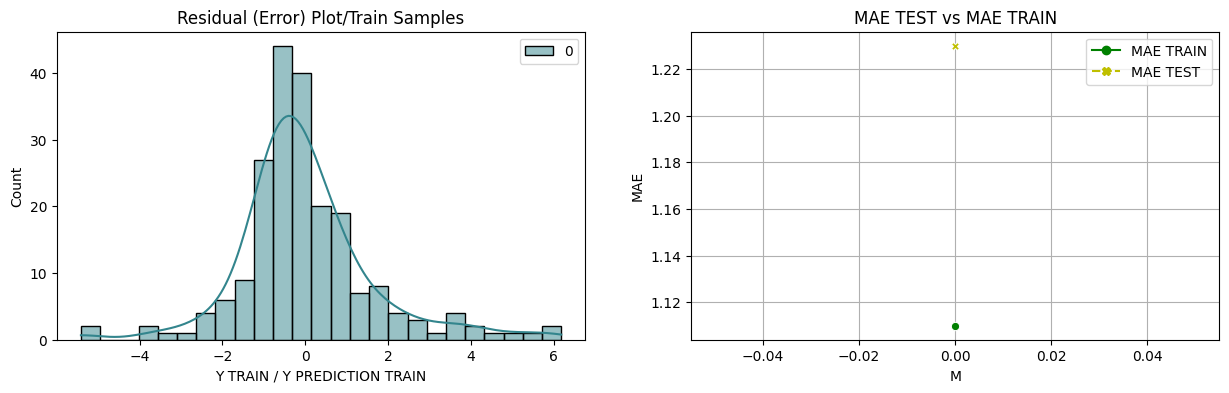

,COLUMNS,WEIGHT/SLOPE/COEFFICIENT
0,INTERCEPT,-7.886309
1,Present_Price,13.020577
2,Kms_Driven,-2.568561
3,Age,-1.501052
4,Fuel_Type,1.453289
5,Seller_Type,-1.511507
6,Transmission,1.272064
7,Owner,-0.979974


In [84]:
# this time we try test_size=0.3
modeling(x, y, 10, 0.3)

In [85]:
# replacing log10 of Age & Kms_Driven to improve model
nrm2['logAge'] = np.log10(nrm2.Age)
nrm2['logKMSDriven'] = np.log10(nrm2.Kms_Driven)
x = nrm2.drop(['Selling_Price','Age','Kms_Driven'], axis='columns')
y = nrm2.Selling_Price.values.reshape(-1,1)

TRAIN'S SHAPE:  (209, 7) (209, 1)
TEST'S SHAPE:  (90, 7) (90, 1)
TRAIN'S MAE : 1.11
TEST'S MAE : 1.19
TRAIN'S CV Scores : [0.7959793  0.69165108 0.82880574 0.8832732  0.73260704 0.82380873
 0.83435051 0.79509395 0.76586094 0.87415223]
TRAIN'S CV Mean : 0.8
     TRAIN'S R2-score : 0.8987
     TEST'S R2-score : 0.8315


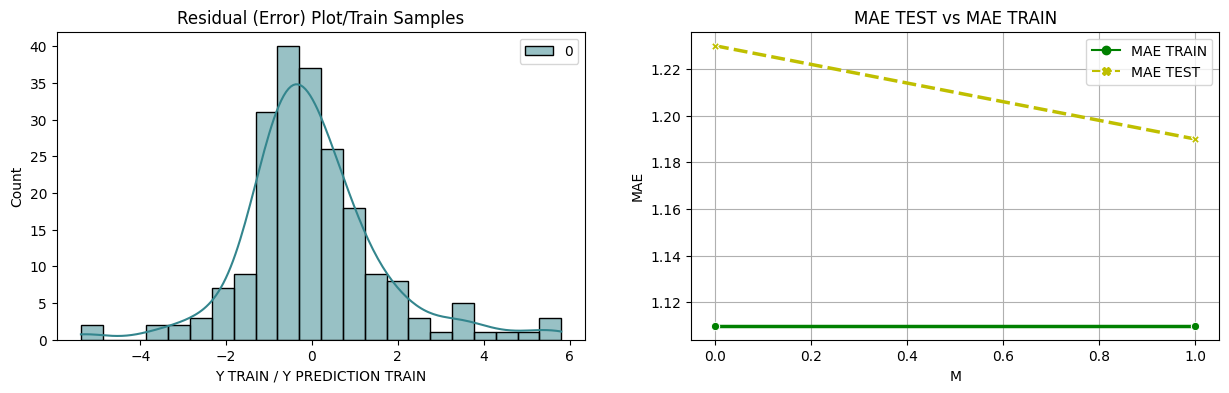

,COLUMNS,WEIGHT/SLOPE/COEFFICIENT
0,INTERCEPT,-11.076466
1,Present_Price,13.033607
2,Fuel_Type,1.511531
3,Seller_Type,-1.586476
4,Transmission,1.189750
5,Owner,-0.983356
6,logAge,-7.413862
7,logKMSDriven,-8.079744


In [86]:
modeling(x,y,10,0.3)

In [87]:
# the following steps are exactly the same as what we had done with test_size=0.2
nrm2['Precent Price & Log Age'] = nrm2.Present_Price * nrm2.logAge 
x = nrm2.drop(['Selling_Price','Age','Kms_Driven'], axis='columns')
y = nrm2.Selling_Price.values.reshape(-1,1)

TRAIN'S SHAPE:  (209, 8) (209, 1)
TEST'S SHAPE:  (90, 8) (90, 1)
TRAIN'S MAE : 0.53
TEST'S MAE : 0.59
TRAIN'S CV Scores : [0.95936823 0.79304104 0.92528062 0.98500532 0.92084589 0.9233543
 0.95868524 0.95224447 0.97789523 0.93780198]
TRAIN'S CV Mean : 0.93
     TRAIN'S R2-score : 0.974
     TEST'S R2-score : 0.971


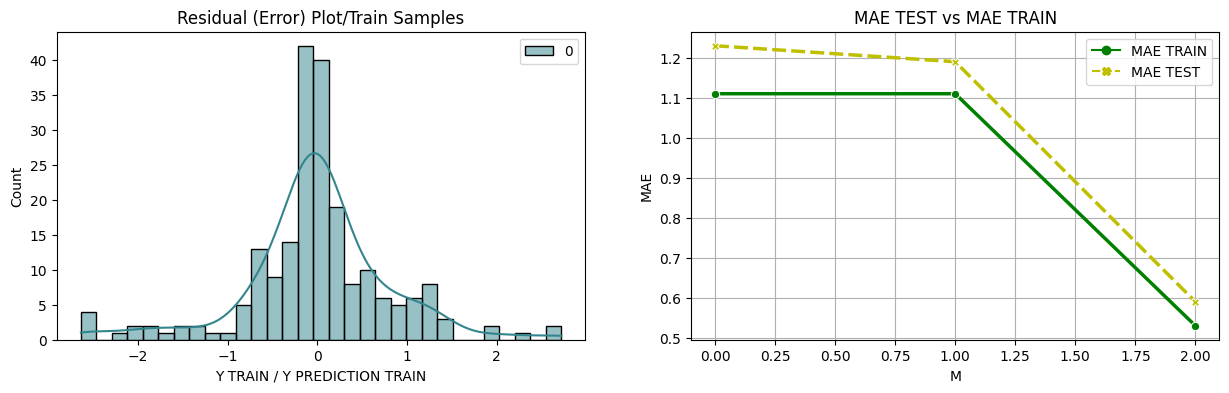

,COLUMNS,WEIGHT/SLOPE/COEFFICIENT
0,INTERCEPT,-29.430004
1,Present_Price,29.115566
2,Fuel_Type,0.874053
3,Seller_Type,-0.232006
4,Transmission,-0.168308
5,Owner,-0.235575
6,logAge,44.897873
7,logKMSDriven,-4.342213
8,Precent Price & Log Age,-44.433460


In [88]:
modeling(x,y,10,0.3)

In [89]:
nrm2['Precent Price & Fuel'] = (nrm2.Present_Price) * nrm2.Fuel_Type
x = nrm2.drop(['Selling_Price','Age','Kms_Driven'], axis='columns')
y = nrm2.Selling_Price.values.reshape(-1,1)

TRAIN'S SHAPE:  (209, 9) (209, 1)
TEST'S SHAPE:  (90, 9) (90, 1)
TRAIN'S MAE : 0.5
TEST'S MAE : 0.52
TRAIN'S CV Scores : [0.96973699 0.86390439 0.93717069 0.98287488 0.94020211 0.9642303
 0.94550355 0.94835065 0.98013149 0.95313545]
TRAIN'S CV Mean : 0.95
     TRAIN'S R2-score : 0.9776
     TEST'S R2-score : 0.9787


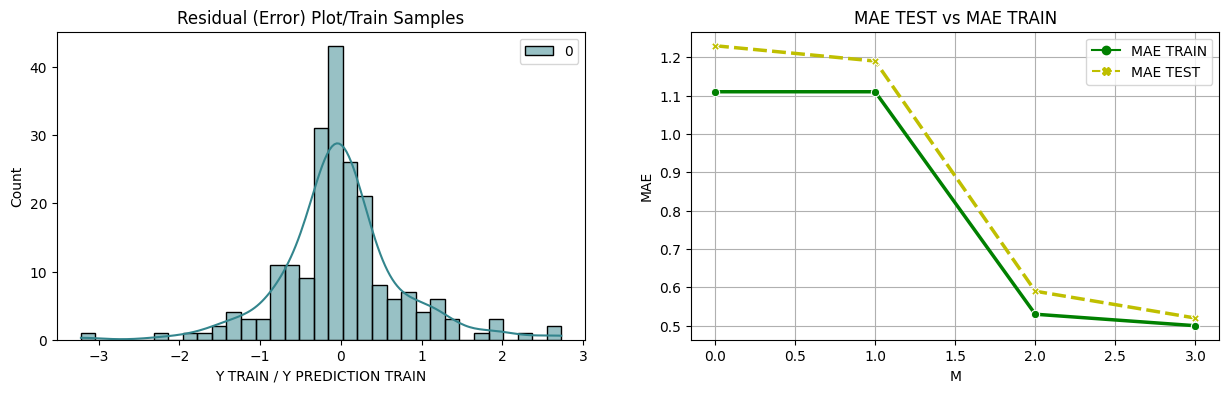

,COLUMNS,WEIGHT/SLOPE/COEFFICIENT
0,INTERCEPT,-17.242928
1,Present_Price,20.749417
2,Fuel_Type,-3.459195
3,Seller_Type,-0.819719
4,Transmission,-0.152807
5,Owner,0.115743
6,logAge,47.516255
7,logKMSDriven,-3.118698
8,Precent Price & Log Age,-46.794743
9,Precent Price & Fuel,3.253538


In [90]:
modeling(x,y,10,0.3)

### model based on test size 0.3 shows higher accuracy

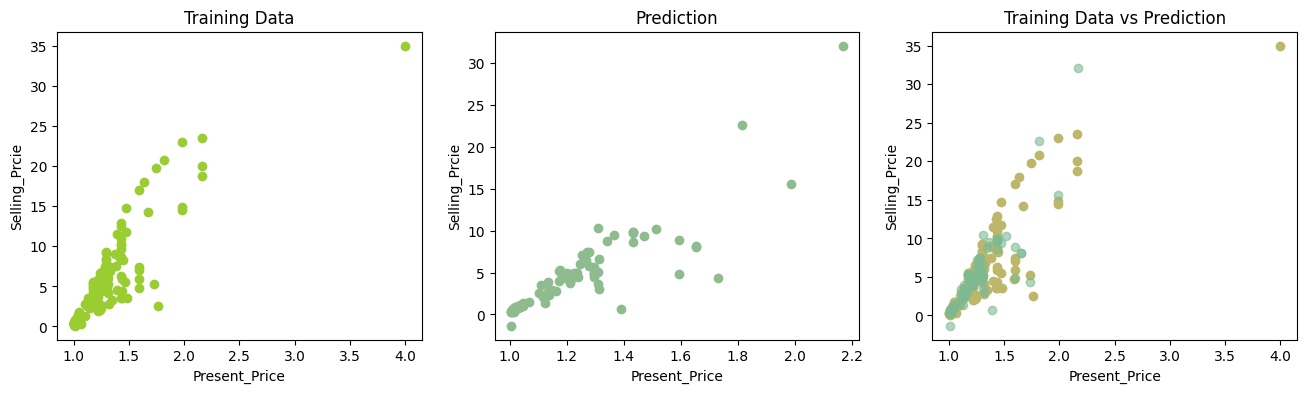

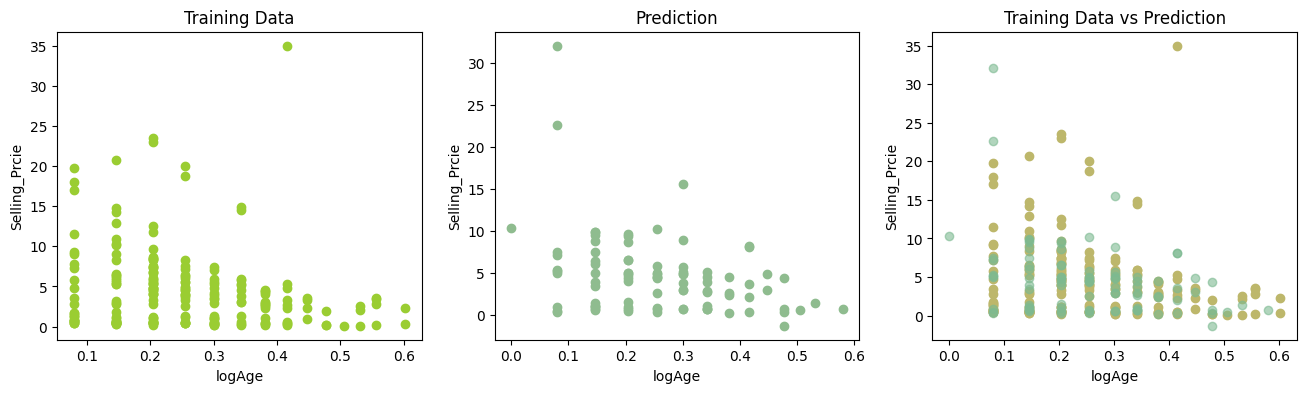

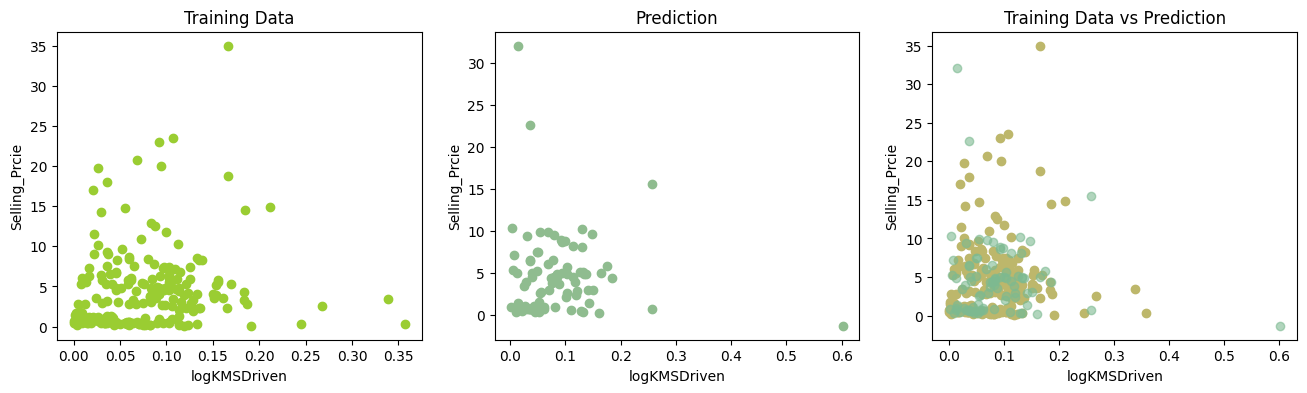

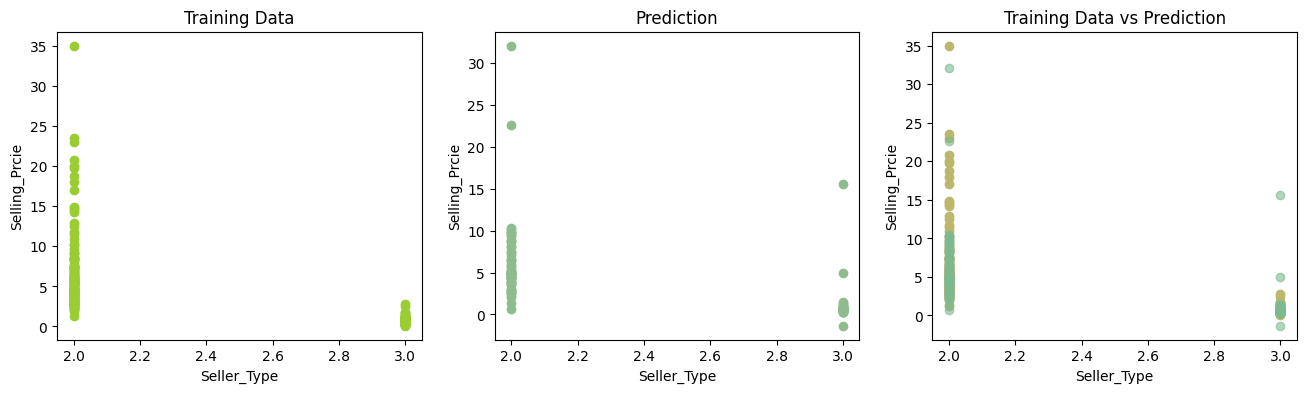

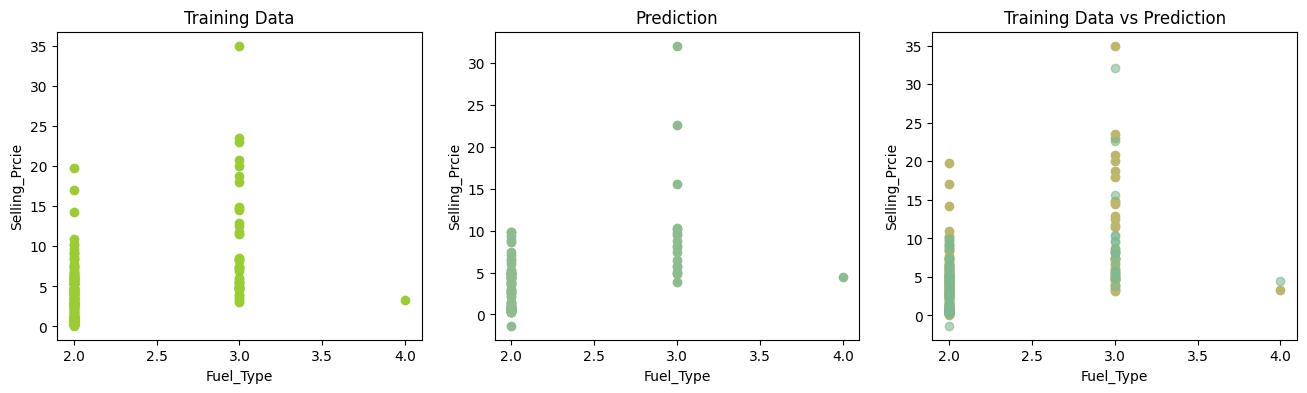

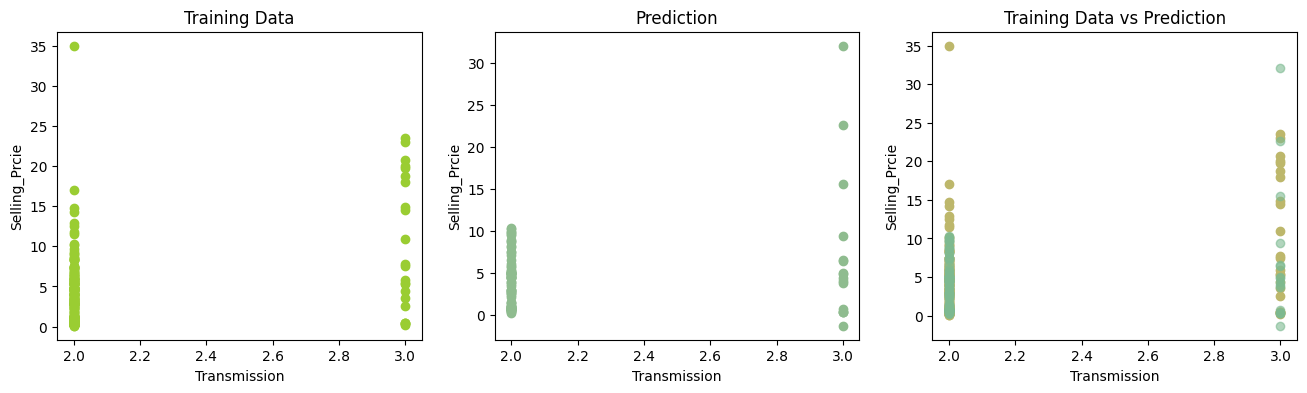

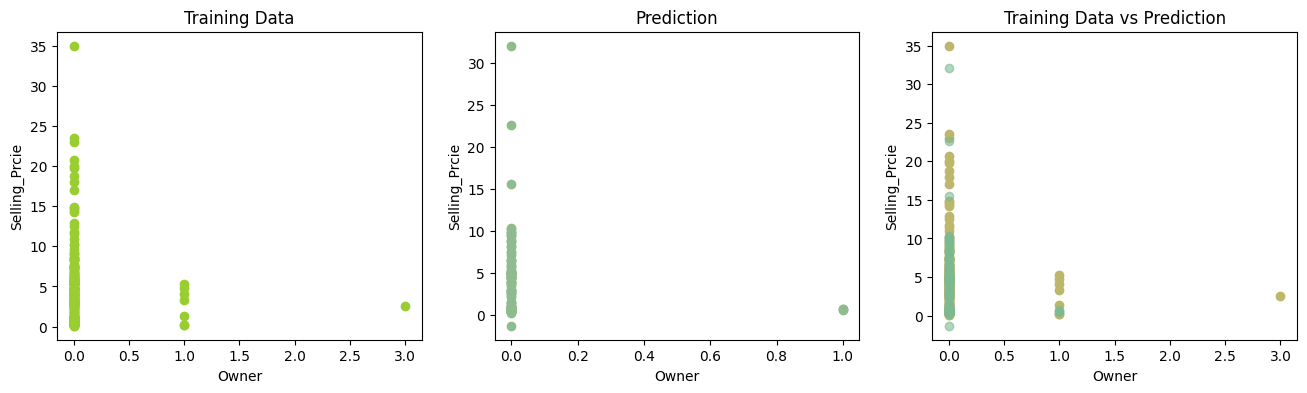

In [91]:
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
b = y_train
d = y_pred_test
columns = ['Present_Price','logAge','logKMSDriven','Seller_Type','Fuel_Type','Transmission','Owner']
for col in columns:
    a = x_train[col]
    c = x_test[col]
    fig , ax = plt.subplots(1,3, figsize=(16,4))
    ax[0].scatter(a, b, label='real', color='yellowgreen')
    ax[0].set_title('Training Data', fontsize=12)
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Selling_Prcie')
    ax[1].scatter(c, d, label='predict', color='darkseagreen')
    ax[1].set_title('Prediction', fontsize=12)
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('Selling_Prcie')
    ax[2].scatter(a, b, label='real', color='darkkhaki')
    ax[2].scatter(c, d, label='predict', alpha=.6)
    ax[2].set_title('Training Data vs Prediction', fontsize=12)
    ax[2].set_xlabel(col)
    ax[2].set_ylabel('Selling_Prcie')

    plt.show()

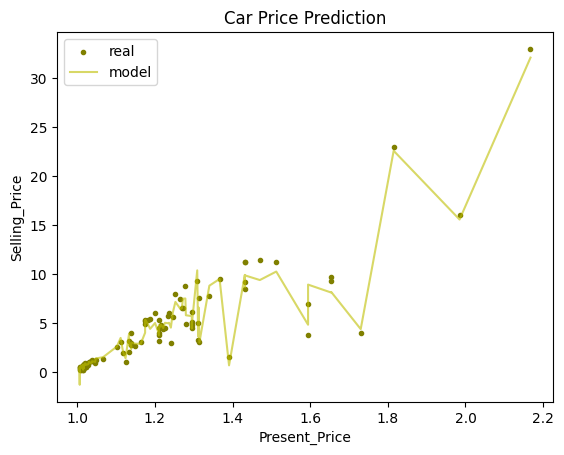

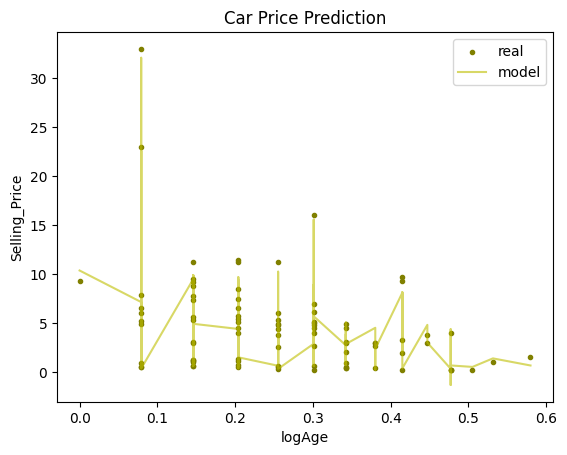

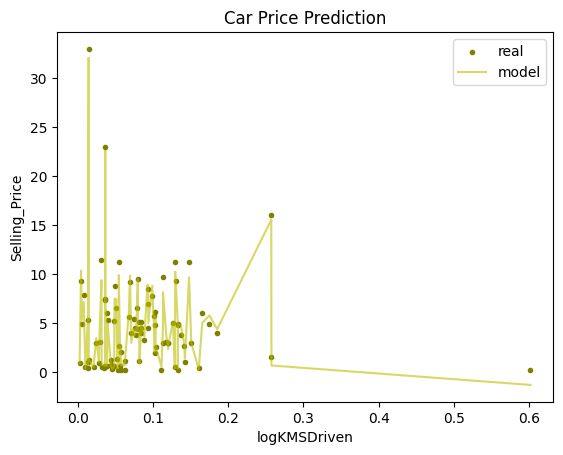

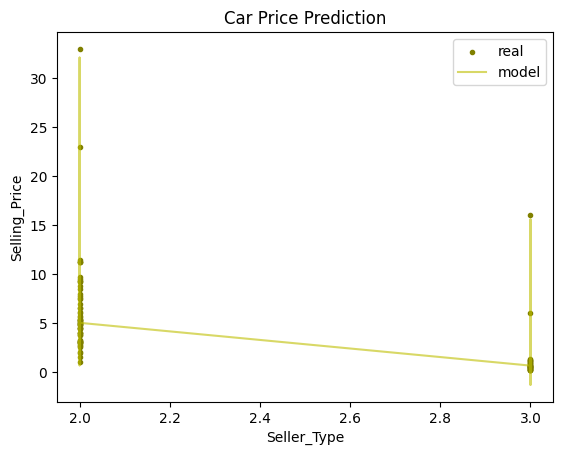

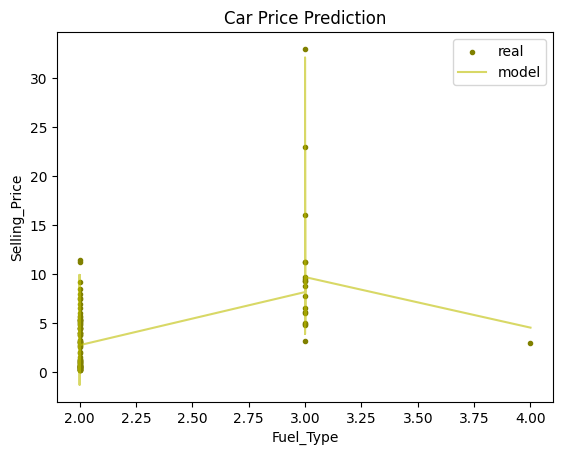

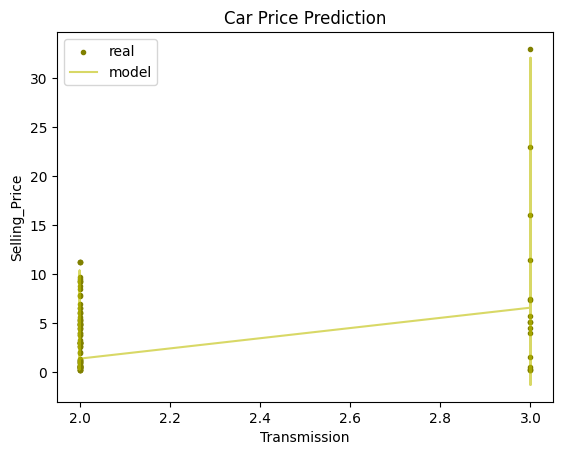

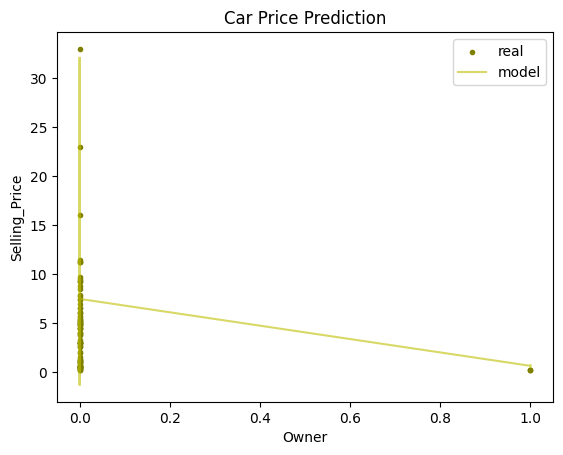

In [92]:
x_test.insert(0, 'y_test', y_test)
x_test.insert(0, 'y_pred', y_pred_test)
for col in columns:
    dffinal = x_test.sort_values(by=[col])
    plt.scatter(dffinal[col], dffinal.y_test, marker='.', color='olive', label='real')
    plt.plot(dffinal[col], dffinal.y_pred, color='y', alpha=0.6, label='model')
    plt.title('Car Price Prediction', fontsize=12)
    plt.xlabel(f'{col}')
    plt.ylabel('Selling_Price')
    plt.legend()
    plt.show()

MAE: 0.5244858760957831
MSE: 0.514920389726276
R2 Score: 0.9787161892569796


Text(0, 0.5, 'R2 Score')

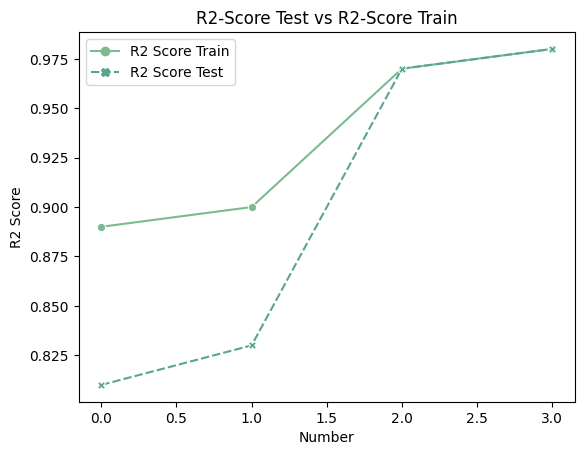

In [93]:
mae_test_model = metrics.mean_absolute_error(y_test, y_pred_test)
mse_test_model = metrics.mean_squared_error(y_test, y_pred_test)
r2_test_model = metrics.r2_score(y_test, y_pred_test)
print(f'MAE: {mae_test_model}')
print(f'MSE: {mse_test_model}')
print(f'R2 Score: {r2_test_model}')
sns.lineplot(data=pd.DataFrame({'R2 Score Train': R2_train, 'R2 Score Test': R2_test}), markers=True)
plt.title('R2-Score Test vs R2-Score Train', fontsize=12)
plt.xlabel('Number')
plt.ylabel('R2 Score')

In [94]:
# adding sample rows & test datas to model
x = df4.drop('Selling_Price', axis=1)
y = df4.Selling_Price.values.reshape(-1,1)
cols_name = {'Present_Price':11.23,'Age':10,'Kms_Driven':42000,'Seller_Type':2,'Fuel_Type':2,'Transmission':2,'Owner':1}
print('\033[32m' + '     Guide:' + '\033[0m')
print("Seller_Type: 2=Dealer , 3=Individual - Fuel_Type: 2=Diesel , 3=Petrol , 4=CNG - Transmission: 2=Automatic , 3=Manual")
s = pd.DataFrame()
for col, value in cols_name.items():
    s[col] = [value]
    print(f"{col}: {value}")
x = pd.concat([x,s])
x['log_Age'] = np.log10(x['Age'])
x['log_Kms_Driven'] = np.log10(x['Kms_Driven'])
x['Precent Price & Log Age'] = x['Present_Price']*x['log_Age']
x['Precent Price & Fuel'] = x['Present_Price']*x['Fuel_Type']
x = x.drop(['Age', 'Kms_Driven'], axis=1)
x_train = x[:len(x)-1]
x_test = x[len(x)-1:]
y_train = y
final_model = LinearRegression()
final_model.fit(x_train, y_train)
parameters1 = ['Intercept'] + x.columns.to_list()
final_slope_table = pd.DataFrame({'COLUMNS': parameters1})
slope = [i for i in final_model.intercept_] + final_model.coef_.tolist()[0]
final_slope_table = final_slope_table.join(pd.Series(slope, name='SLOPE'))
print(final_slope_table, '\n')
y_pred = final_model.predict(x_test)
print(f"\33[94m                                                Predected Selling Price is: {round(y_pred[0][0], 5)}")

     Guide:
Seller_Type: 2=Dealer , 3=Individual - Fuel_Type: 2=Diesel , 3=Petrol , 4=CNG - Transmission: 2=Automatic , 3=Manual
Present_Price: 11.23
Age: 10
Kms_Driven: 42000
Seller_Type: 2
Fuel_Type: 2
Transmission: 2
Owner: 1
                   COLUMNS     SLOPE
0                Intercept  4.372263
1            Present_Price  0.777697
2                Fuel_Type -0.478069
3              Seller_Type -1.015550
4             Transmission  0.054570
5                    Owner -0.090120
6                  log_Age  0.465414
7           log_Kms_Driven -0.143854
8  Precent Price & Log Age -0.847584
9     Precent Price & Fuel  0.131729 

                                                Predected Selling Price is: 3.3782


In [95]:
print(np.isinf(df4).sum())

Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Age              0
dtype: int64


In [96]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64